## Cubic Zirconia Price Prediction

### Problem Statement:1
You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import scipy.stats as stats
from scipy.stats import variation

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV
sns.set(color_codes=True)
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

import warnings 
warnings.filterwarnings("ignore")

#### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

#### Read the data into the notebook

In [2]:
cubic_df1= pd.read_csv('cubic_zirconia.csv',index_col=0)

In [3]:
# Creating a copy
cubic_df1_cpy = cubic_df1.copy()

In [4]:
cubic_df1.head()

carat        cut color clarity  depth  table     x     y     z  price
1   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66    499
2   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70    984
3   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   6289
4   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   1082
5   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65    779

In [5]:
cubic_df1.tail()

carat        cut color clarity  depth  table     x     y     z  price
26963   1.11    Premium     G     SI1   62.3   58.0  6.61  6.52  4.09   5408
26964   0.33      Ideal     H      IF   61.9   55.0  4.44  4.42  2.74   1114
26965   0.51    Premium     E     VS2   61.7   58.0  5.12  5.15  3.17   1656
26966   0.27  Very Good     F    VVS2   61.8   56.0  4.19  4.20  2.60    682
26967   1.25    Premium     J     SI1   62.0   58.0  6.90  6.88  4.27   5166

### Exploratory Data Analysis

### Checking the data types /information

In [6]:
cubic_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


### Inference :
    
The data set contains 26967 observations of data and 10 features. All columns except cut, color and clarity are of numeric in nature.

Since non null count is same in every column variable except depth, hence there is null data in depth column

### Checking the shape (Number of rows and columns)

In [7]:
print('The dataset has {} rows and {} columns'.format(cubic_df1.shape[0],cubic_df1.shape[1]))

The dataset has 26967 rows and 10 columns


### Summary of the Dataset

In [8]:
cubic_df1.describe(include="all")

carat    cut  color clarity         depth         table  \
count   26967.000000  26967  26967   26967  26270.000000  26967.000000   
unique           NaN      5      7       8           NaN           NaN   
top              NaN  Ideal      G     SI1           NaN           NaN   
freq             NaN  10816   5661    6571           NaN           NaN   
mean        0.798375    NaN    NaN     NaN     61.745147     57.456080   
std         0.477745    NaN    NaN     NaN      1.412860      2.232068   
min         0.200000    NaN    NaN     NaN     50.800000     49.000000   
25%         0.400000    NaN    NaN     NaN     61.000000     56.000000   
50%         0.700000    NaN    NaN     NaN     61.800000     57.000000   
75%         1.050000    NaN    NaN     NaN     62.500000     59.000000   
max         4.500000    NaN    NaN     NaN     73.600000     79.000000   

                   x             y             z         price  
count   26967.000000  26967.000000  26967.000000  26967.000000  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
mean        5.729854      5.733569      3.538057   3939.518115  
std         1.128516      1.166058      0.720624   4024.864666  
min         0.000000      0.000000      0.000000    326.000000  
25%         4.710000      4.710000      2.900000    945.000000  
50%         5.690000      5.710000      3.520000   2375.000000  
75%         6.550000      6.540000      4.040000   5360.000000  
max        10.230000     58.900000     31.800000  18818.000000

### Checking for Null Values

In [9]:
cubic_df1.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

### Checking for duplicates

In [10]:
# Check for duplicate data

dups = cubic_df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

cubic_df1[dups]

Number of duplicate rows = 34


carat        cut color clarity  depth  table     x     y     z  price
4757    0.35    Premium     J     VS1   62.4   58.0  5.67  5.64  3.53    949
6216    0.71       Good     F     SI2   64.1   60.0  0.00  0.00  0.00   2130
8145    0.33      Ideal     G     VS1   62.1   55.0  4.46  4.43  2.76    854
8920    1.52       Good     E      I1   57.3   58.0  7.53  7.42  4.28   3105
9819    0.35      Ideal     F     VS2   61.4   54.0  4.58  4.54  2.80    906
10474   0.79      Ideal     G     SI1   62.3   57.0  5.90  5.85  3.66   2898
10501   1.00    Premium     F    VVS2   60.6   54.0  6.56  6.52  3.96   8924
12895   1.21    Premium     D     SI2   62.5   57.0  6.79  6.71  4.22   6505
13548   0.43      Ideal     G     VS1   61.9   55.0  4.84  4.86  3.00    943
13784   0.79      Ideal     G     SI1   62.3   57.0  5.90  5.85  3.66   2898
14390   0.60    Premium     D     SI2   62.0   57.0  5.43  5.35  3.34   1196
14411   1.00  Very Good     D     SI1   63.1   56.0  6.34  6.30  3.99   5645
15799   0.90  Very Good     I     VS2   58.4   62.0  6.29  6.35  3.69   3334
16853   0.79      Ideal     G     SI1   62.3   57.0  5.90  5.85  3.66   2898
17264   1.04    Premium     I     SI2   62.0   57.0  6.53  6.47  4.03   3774
18026   1.51       Good     I     SI1   63.8   57.0  7.21  7.18  4.59   6046
18778   0.32    Premium     H     VS2   60.6   58.0  4.47  4.44  2.70    648
18838   1.01    Premium     H     VS1   61.2   61.0  6.44  6.41  3.93   5294
19732   0.30       Good     J     VS1   63.4   57.0  4.23  4.26  2.69    394
19878   2.01    Premium     I     VS2   60.3   62.0  8.13  8.08  4.89  15939
20302   0.30      Ideal     H     SI1   62.2   57.0  4.26  4.29  2.66    450
20761   1.80      Ideal     H     VS1   62.3   56.0  7.79  7.76  4.84  15105
22323   2.05    Premium     I     SI2   62.0   58.0  8.13  8.08  5.02   9850
22489   2.42    Premium     J     VS2   61.3   59.0  8.61  8.58  5.27  17168
22584   0.33      Ideal     F      IF   61.2   56.0  4.47  4.49  2.74   1240
23459   2.66       Good     H     SI2   63.8   57.0  8.71  8.65  5.54  16239
23565   1.50    Premium     F     SI2   58.5   60.0  7.52  7.48  4.39   7644
24352   2.50       Fair     H     SI2   64.9   58.0  8.46  8.43  5.48  13278
24817   1.50       Good     G     SI2   57.5   63.0  7.53  7.49  4.32   6006
25269   1.20    Premium     I     VS2   62.6   58.0  6.77  6.72  4.22   5699
25760   0.30      Ideal     G      IF   62.1   55.0  4.32  4.35  2.69    863
25942   0.51    Premium     F     SI2   58.1   59.0  5.26  5.24  3.05   1052
26192   2.54  Very Good     H     SI2   63.5   56.0  8.68  8.65  5.50  16353
26531   0.41      Ideal     G      IF   61.7   56.0  4.77  4.80  2.95   1367

### Inference :
    
    Only 34 duplicates are present in the data which is around 0.12% of data. Hence we are removing these duplicates entries

### Removing the duplicates

In [11]:
cubic_df1.drop_duplicates(inplace=True)

In [12]:
dups = cubic_df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

cubic_df1[dups]
print (cubic_df1.shape)

Number of duplicate rows = 0
(26933, 10)


### Univariate Analysis

In [13]:
## Using User definition to return IQR, LR, UR for a column
def return_IQR_LR_UR(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=round((Q3-Q1),2)
    lower_range= round(Q1-(1.5 * IQR),2)
    upper_range= round(Q3+(1.5 * IQR),2)
    return IQR, lower_range, upper_range

In [14]:
# creating a function to return CV, skew, IQR, Upper range, lower range of dataframe
def CV_row(df):   
    i=0;
    CV=[]
    Skew=[]
    IQR=[]
    UR=[]
    LR=[]
    numeric_col_names=cubic_df1.select_dtypes(exclude='object').columns
    for i in df.columns:
        if (i in numeric_col_names):
            CV.append(round(variation(df[i]),2))
            Skew.append(round(df[i].skew(),2))
            
            
            IQR_val, lower_range, upper_range = return_IQR_LR_UR(df[i])
            IQR.append(round(IQR_val,2))
            UR.append(round(upper_range,2))
            LR.append(round(lower_range,2))

    return CV, Skew, IQR,  UR, LR 

In [15]:
def calc_rows(Col_list,no_of_graph_row=4):  
    if (len(Col_list) % no_of_graph_row == 0):
        rows= len(Col_list) / no_of_graph_row
    else:
        rows= len(Col_list) / no_of_graph_row + 1
    return rows

### Checking for summary

In [16]:
cubic_df1_summ=pd.DataFrame(cubic_df1.describe().round(4))

### Checking IQR, Coeffiecient of Variation, IQR, lower range and upper range of numerical cols

In [17]:
cubic_df1_summ.loc["CV"],cubic_df1_summ.loc["Skew"],cubic_df1_summ.loc["IQR"],cubic_df1_summ.loc["UR"],cubic_df1_summ.loc["LR"]= CV_row(cubic_df1)

In [18]:
cubic_df1_summ.round(4)

carat       depth       table           x           y           z  \
count  26933.0000  26236.0000  26933.0000  26933.0000  26933.0000  26933.0000   
mean       0.7980     61.7453     57.4559      5.7293      5.7331      3.5378   
std        0.4772      1.4122      2.2322      1.1274      1.1650      0.7200   
min        0.2000     50.8000     49.0000      0.0000      0.0000      0.0000   
25%        0.4000     61.0000     56.0000      4.7100      4.7100      2.9000   
50%        0.7000     61.8000     57.0000      5.6900      5.7000      3.5200   
75%        1.0500     62.5000     59.0000      6.5500      6.5400      4.0400   
max        4.5000     73.6000     79.0000     10.2300     58.9000     31.8000   
CV         0.6000         NaN      0.0400      0.2000      0.2000      0.2000   
Skew       1.1100     -0.0300      0.7700      0.3900      3.8700      2.5800   
IQR        0.6500      1.5000      3.0000      1.8400      1.8300      1.1400   
UR         2.0300     64.7500     63.5000      9.3100      9.2900      5.7500   
LR        -0.5800     58.7500     51.5000      1.9500      1.9600      1.1900   

            price  
count  26933.0000  
mean    3937.5261  
std     4022.5519  
min      326.0000  
25%      945.0000  
50%     2375.0000  
75%     5356.0000  
max    18818.0000  
CV         1.0200  
Skew       1.6200  
IQR     4411.0000  
UR     11972.5000  
LR     -5671.5000

#### Inference :
    
    From summary, we can see that :-

        x, y and z have min values 0. These corresponds to Length, width and height which cannot be 0 for zirconia diamond.
        
        Except price, mean and median values appears to be similar for other attributes.
        
        All the columns are right skewed except depth
        
        Average price is higher than the middle most value in price. So there appears to be few zirconium which lies in higher price zone as compared to the others.
        
        Looking at the LR and UR, it appears that these columns does contains outliers.

In [19]:
for column in cubic_df1.columns:
    if cubic_df1[column].dtype == 'object':
        print(column.upper(),': ',cubic_df1[column].nunique())
        print(cubic_df1[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5653
Name: color, dtype: int64


CLARITY :  8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




In [20]:
cubic_df1[['carat' ,'depth', 'table', 'x', 'y', 'z','price']].nunique()

carat     257
depth     169
table     112
x         531
y         526
z         356
price    8742
dtype: int64

In [21]:
cubic_df1.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

### Univariate Analysis

Text(0.5, 1.0, 'x Distribution')

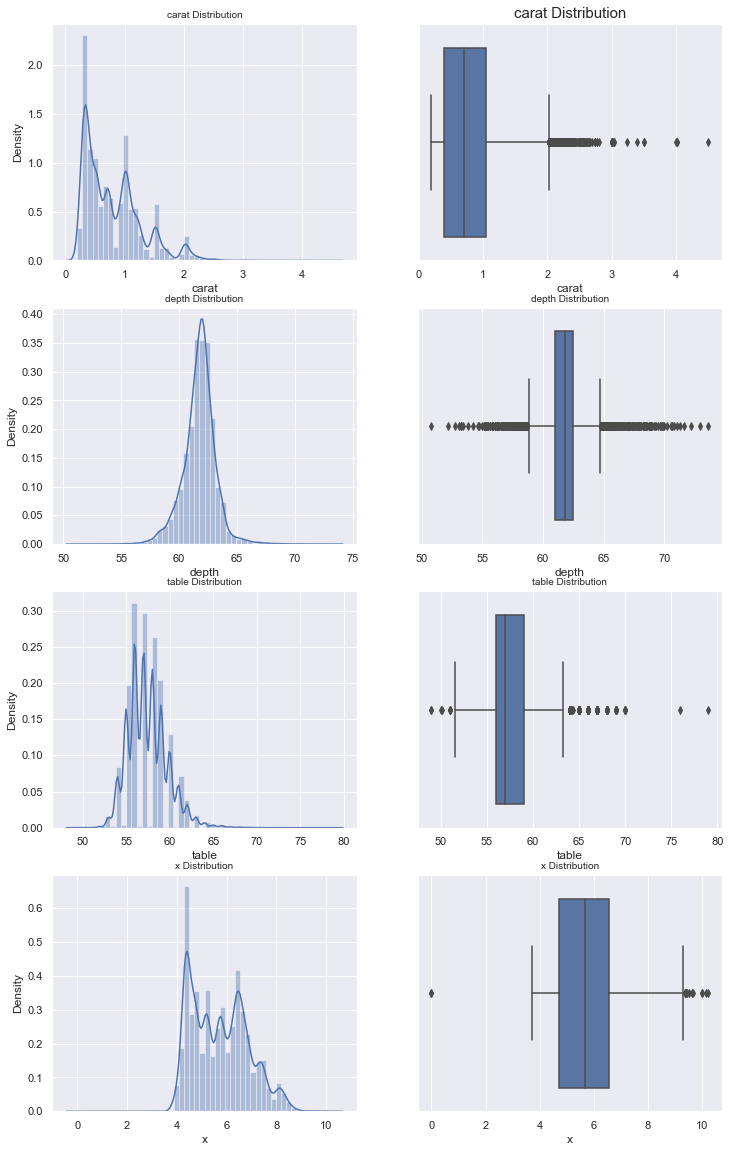

In [22]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(cubic_df1['carat'] , ax=axes[0][0])
a.set_title("carat Distribution",fontsize=10)
a = sns.boxplot(cubic_df1['carat'] , orient = "v" , ax=axes[0][1])
a.set_title("carat Distribution",fontsize=15)

a = sns.distplot(cubic_df1['depth'] , ax=axes[1][0])
a.set_title("depth Distribution",fontsize=10)

a = sns.boxplot(cubic_df1['depth'] , orient = "v" , ax=axes[1][1])
a.set_title("depth Distribution",fontsize=10)

a = sns.distplot(cubic_df1['table'] , ax=axes[2][0])
a.set_title("table Distribution",fontsize=10)

a = sns.boxplot(cubic_df1['table'] , orient = "v" , ax=axes[2][1])
a.set_title("table Distribution",fontsize=10)

a = sns.distplot(cubic_df1['x'] , ax=axes[3][0])
a.set_title("x Distribution",fontsize=10)

a = sns.boxplot(cubic_df1['x'] , orient = "v" , ax=axes[3][1])
a.set_title("x Distribution",fontsize=10)

Text(0.5, 1.0, 'price Distribution')

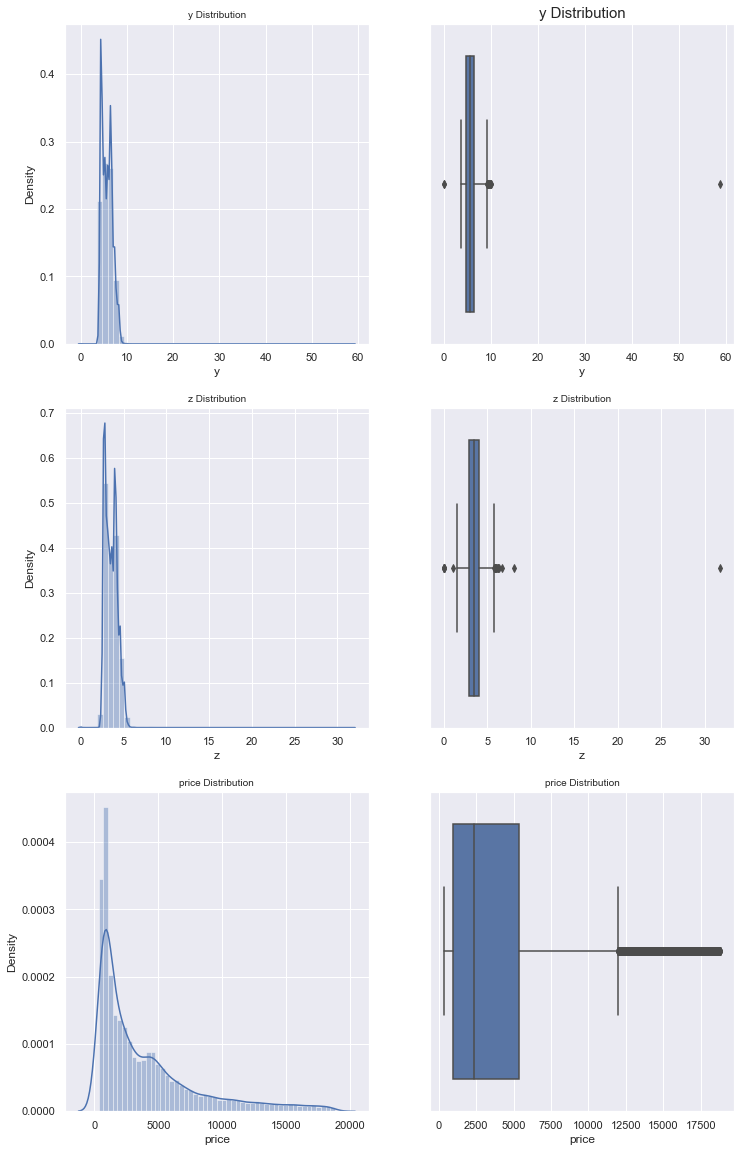

In [23]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(cubic_df1['y'] , ax=axes[0][0])
a.set_title("y Distribution",fontsize=10)
a = sns.boxplot(cubic_df1['y'] , orient = "v" , ax=axes[0][1])
a.set_title("y Distribution",fontsize=15)

a = sns.distplot(cubic_df1['z'] , ax=axes[1][0])
a.set_title("z Distribution",fontsize=10)

a = sns.boxplot(cubic_df1['z'] , orient = "v" , ax=axes[1][1])
a.set_title("z Distribution",fontsize=10)

a = sns.distplot(cubic_df1['price'] , ax=axes[2][0])
a.set_title("price Distribution",fontsize=10)

a = sns.boxplot(cubic_df1['price'] , orient = "v" , ax=axes[2][1])
a.set_title("price Distribution",fontsize=10)

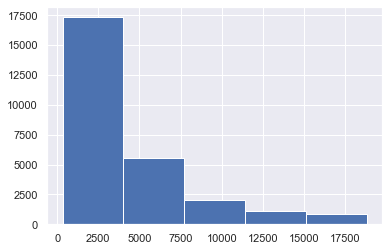

In [24]:
plt.hist(cubic_df1.price, bins = 5)

plt.show()

### Categorical Variables

<AxesSubplot:xlabel='cut', ylabel='count'>

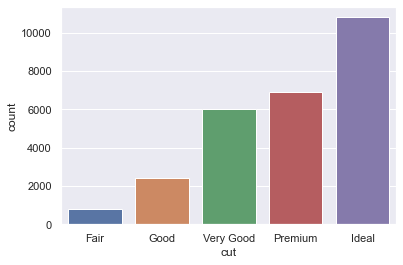

In [25]:
sns.countplot(cubic_df1['cut'], order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

<AxesSubplot:xlabel='cut', ylabel='price'>

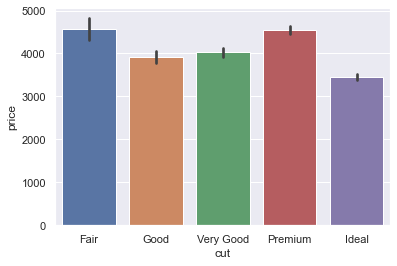

In [26]:
sns.barplot(data = cubic_df1, x='cut',y='price',order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

<AxesSubplot:xlabel='color', ylabel='count'>

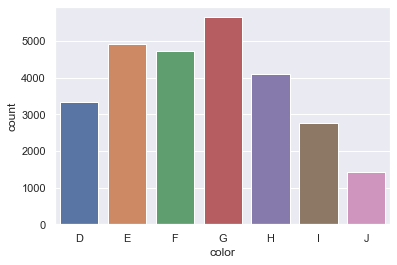

In [27]:
sns.countplot(cubic_df1['color'] ,order = ['D', 'E', 'F', 'G','H', 'I', 'J'])

<AxesSubplot:xlabel='color', ylabel='price'>

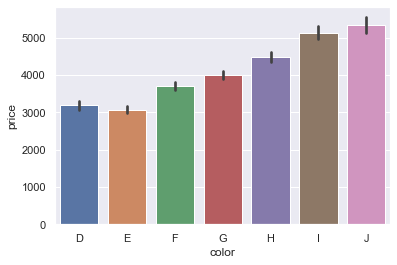

In [28]:
sns.barplot(data = cubic_df1, x='color',y='price',order = ['D', 'E', 'F', 'G','H', 'I', 'J'] )

<AxesSubplot:xlabel='clarity', ylabel='count'>

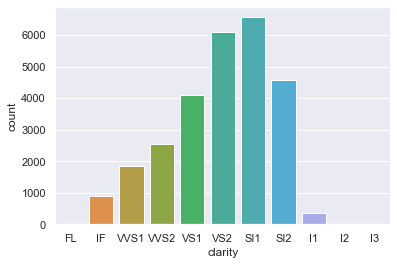

In [29]:
sns.countplot(cubic_df1['clarity'], order = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

<AxesSubplot:xlabel='clarity', ylabel='price'>

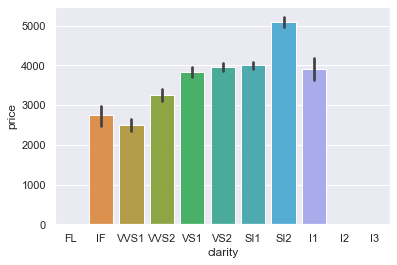

In [30]:
sns.barplot(data = cubic_df1, x='clarity',y='price', order =['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

In [31]:
pd.crosstab(cubic_df1['cut'], cubic_df1['color'])

color         D     E     F     G     H     I    J
cut                                               
Fair         74   100   148   147   149    94   68
Good        311   490   453   418   351   252  160
Ideal      1409  1966  1891  2463  1550  1073  453
Premium     806  1174  1164  1471  1159   707  405
Very Good   741  1186  1067  1154   886   639  354

<AxesSubplot:xlabel='cut'>

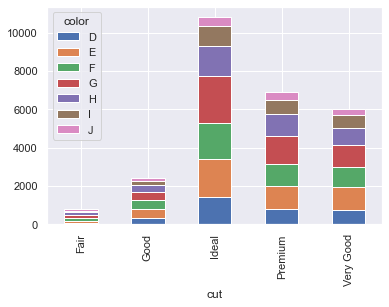

In [32]:
pd.crosstab(cubic_df1['cut'], cubic_df1['color']).plot(kind = 'bar', stacked = True)

In [33]:
pd.crosstab(cubic_df1['cut'], cubic_df1['clarity'])

clarity     I1   IF   SI1   SI2   VS1   VS2  VVS1  VVS2
cut                                                    
Fair        89    4   193   224    93   129    10    38
Good        50   30   764   527   330   491   100   143
Ideal       74  610  2146  1324  1781  2527  1036  1307
Premium    108  115  1809  1443   996  1693   307   415
Very Good   43  132  1653  1046   887  1253   386   627

<AxesSubplot:xlabel='cut'>

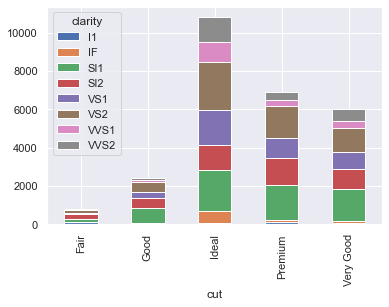

In [34]:
pd.crosstab(cubic_df1['cut'], cubic_df1['clarity']).plot(kind = 'bar', stacked = True)

### Data Distribution

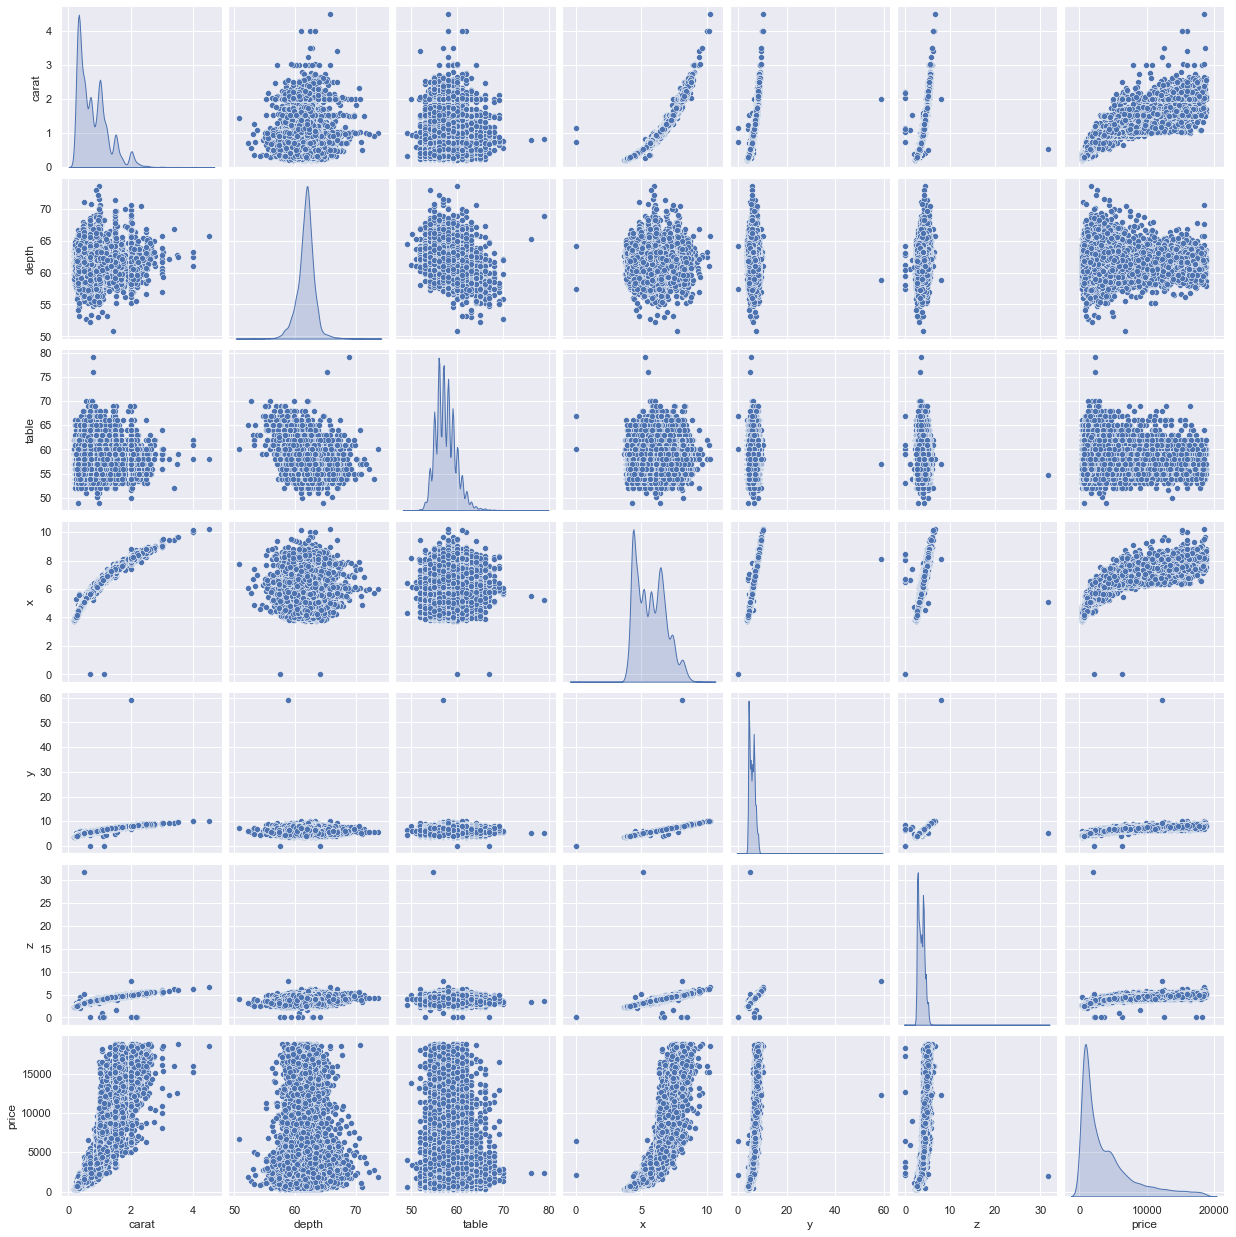

In [35]:
sns.pairplot(cubic_df1, diag_kind='kde')  
plt.show()

### Check for Correlations

<AxesSubplot:>

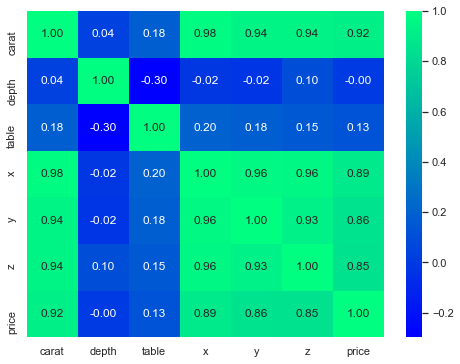

In [36]:
df_cor = cubic_df1.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, fmt = '.2f', cmap='winter')

#### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

### Imputing missing values

As only Depth , x, y and z column contains the Null values and it contains outliers. We are imputing it with the Median.

### Simple Imputer

The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.

### Check for Missing Values

In [37]:
# Check for missing value in any colum
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    percent = percent.round(2)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(cubic_df1)

Total  Percent
depth      697     2.59
price        0     0.00
z            0     0.00
y            0     0.00
x            0     0.00
table        0     0.00
clarity      0     0.00
color        0     0.00
cut          0     0.00
carat        0     0.00

### Inference :
We can confirm that there is NULL value in depth column

### Checking for zero  value in x, y, z

In [38]:
cubic_df1[(cubic_df1.x==0)|(cubic_df1.y==0)|(cubic_df1.z==0)]

carat      cut color clarity  depth  table     x     y    z  price
5822    0.71     Good     F     SI2   64.1   60.0  0.00  0.00  0.0   2130
6035    2.02  Premium     H     VS2   62.7   53.0  8.02  7.95  0.0  18207
10828   2.20  Premium     H     SI1   61.2   59.0  8.42  8.37  0.0  17265
12499   2.18  Premium     H     SI2   59.4   61.0  8.49  8.45  0.0  12631
12690   1.10  Premium     G     SI2   63.0   59.0  6.50  6.47  0.0   3696
17507   1.14     Fair     G     VS1   57.5   67.0  0.00  0.00  0.0   6381
18195   1.01  Premium     H      I1   58.1   59.0  6.66  6.60  0.0   3167
23759   1.12  Premium     G      I1   60.4   59.0  6.71  6.67  0.0   2383

There are 8 rows for which length/width/height is 0. Since these values cannot be 0 , these are missing values too. Count of these rows are very very less. We can either drop them or impute with the median values

In [39]:
cubic_df1.x.replace(0,np.nan,inplace=True )
cubic_df1.y.replace(0,np.nan,inplace=True )
cubic_df1.z.replace(0,np.nan,inplace=True )

In [40]:
missing_check(cubic_df1)

Total  Percent
depth      697     2.59
z            8     0.03
y            2     0.01
x            2     0.01
price        0     0.00
table        0     0.00
clarity      0     0.00
color        0     0.00
cut          0     0.00
carat        0     0.00

### Check for Outliers (Which all variables have an outlier?)

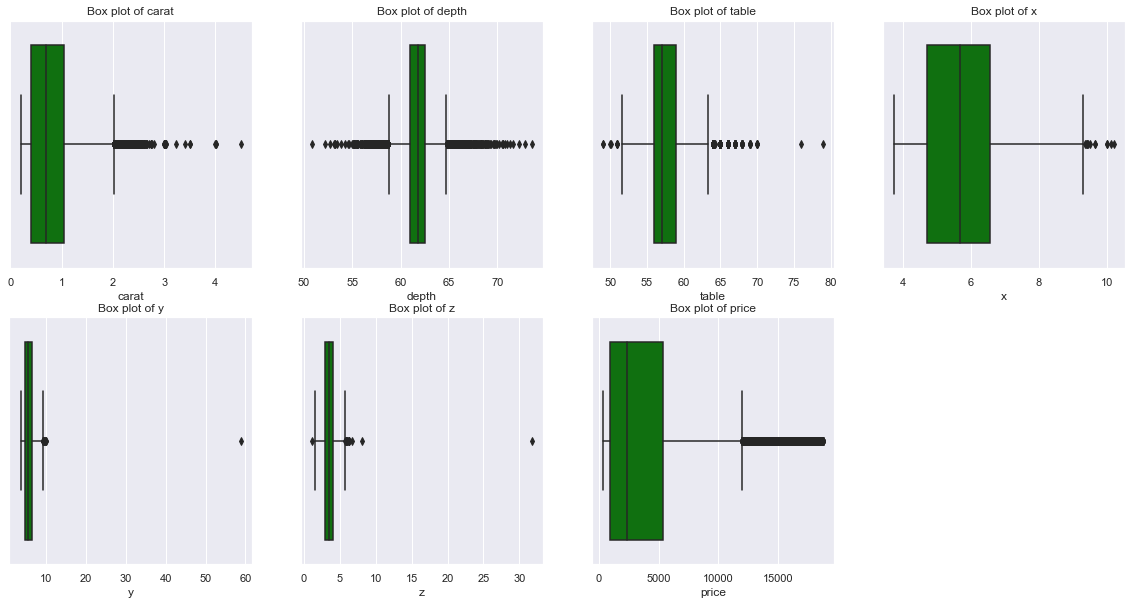

In [41]:
# Checking for Outliers
numeric_col_names=cubic_df1.select_dtypes(exclude='object').columns
no_of_graphs_rows=4
rows=calc_rows(numeric_col_names, no_of_graphs_rows)
sns.set(font_scale=1)
plt.figure(figsize= (20,10))
box_plot_no=1
for col in cubic_df1.columns :
    if (col in numeric_col_names):
        box_plot_title = "Box plot of " + col
        plt.subplot(rows,no_of_graphs_rows,box_plot_no)
        sns.boxplot(x= col,data =cubic_df1 ,color='green').set(title =box_plot_title)
        box_plot_no = box_plot_no + 1

###### As evident from above box plot, there are outliers in all the numeric attributes

### Plot the Histograms

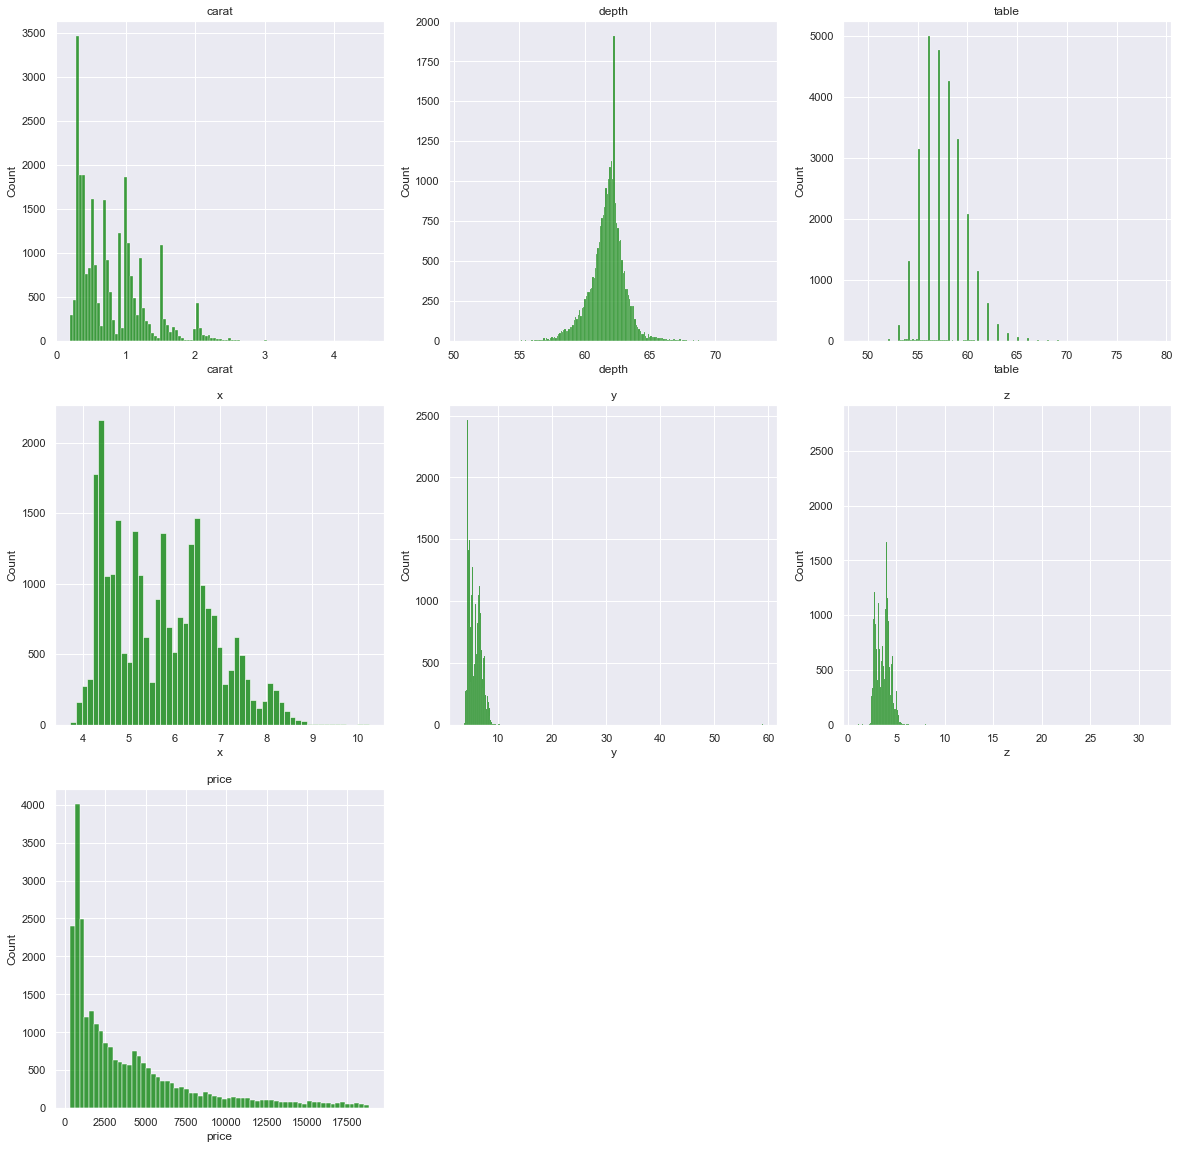

In [42]:
#Plots to see the distribution of the continuous features individually
plt.figure(figsize= (20,20))
distplot_no=1
sns.set(font_scale=1)
no_of_graphs_rows=3
rows=calc_rows(numeric_col_names, no_of_graphs_rows)

for col in cubic_df1.columns :
    if (col in numeric_col_names):
        distplot_title = col
        plt.subplot(rows,no_of_graphs_rows,distplot_no)
        sns.histplot(cubic_df1[col] ,color='green').set(title =distplot_title)
        distplot_no = distplot_no + 1

Inference :
    
    From histograms we can see that
    
        For majority of the zirconium, carot lies between 0.2 to 1. There is few occurrenc of Above 2 carats diamonds. 
        
        Length(x) of the cubic zirconia (in mm) is varying from 4 to 8
        
        Width(y) of the cubic zirconia (in mm) is varying from 5 to 8
        
        Height(z) of the cubic zirconia (in mm) is varying from 2.5 to 5
        
        Majority of Depth ranges from 60 to 64
        
        Majority of table value ranges from 55 to 63

### Outlier Treatment (Flooring and Capping)

In [43]:
# taking backup before treating outliers
cubic_df1_bef_OT=cubic_df1.copy()

In [44]:
## Using User definition to return IQR, LR, UR for a column
def return_IQR_LR_UR(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=round((Q3-Q1),2)
    lower_range= round(Q1-(1.5 * IQR),2)
    upper_range= round(Q3+(1.5 * IQR),2)
    return IQR, lower_range, upper_range

In [45]:
# creating a function to treate outlier and cap and floor upper and lower extreme values
def Outlier_treatment(df,numeric_col_names):   
    i=0;
    for i in df.columns:
        if (i in numeric_col_names):
            IQR, lr, ur = return_IQR_LR_UR(df[i])
            print ('col:', i , ',lower range :', lr, ',upper range:', ur, ',No of outliers:', df[(df[i]<lr)|(df[i]>ur)][i].count(), ',outlier %:', round(df[(df[i]<lr)|(df[i]>ur)][i].count()*100/df[i].count(),2))
            df[i] =np.where(df[i]>ur,ur,df[i])
            df[i] =np.where(df[i]<lr,lr,df[i])

    return df

In [46]:
numeric_col_names[:-1]

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [47]:
cubic_df1=Outlier_treatment(cubic_df1,numeric_col_names[:-1])

col: carat ,lower range : -0.58 ,upper range: 2.03 ,No of outliers: 583 ,outlier %: 2.16
col: depth ,lower range : 58.75 ,upper range: 64.75 ,No of outliers: 1219 ,outlier %: 4.65
col: table ,lower range : 51.5 ,upper range: 63.5 ,No of outliers: 318 ,outlier %: 1.18
col: x ,lower range : 1.95 ,upper range: 9.31 ,No of outliers: 12 ,outlier %: 0.04
col: y ,lower range : 1.97 ,upper range: 9.29 ,No of outliers: 12 ,outlier %: 0.04
col: z ,lower range : 1.19 ,upper range: 5.75 ,No of outliers: 14 ,outlier %: 0.05


### Plotting Box Plot again after outlier's treatment

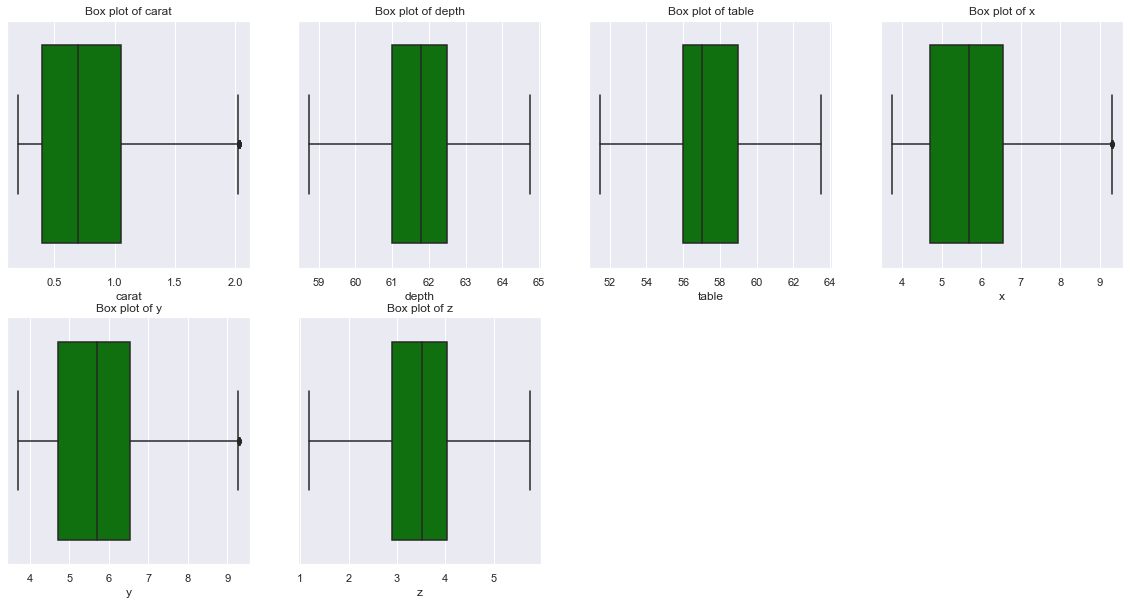

In [48]:
# Checking for Outliers
plt.figure(figsize= (20,10))
box_plot_no=1
no_of_graphs_rows=4
sns.set(font_scale=1)
rows=calc_rows(numeric_col_names[:-1], no_of_graphs_rows)

for col in cubic_df1.columns :
    if (col in numeric_col_names[:-1]):
        box_plot_title = "Box plot of " + col
        plt.subplot(rows,no_of_graphs_rows,box_plot_no)
        sns.boxplot(x= col,data =cubic_df1 ,color='green').set(title =box_plot_title)
        box_plot_no = box_plot_no + 1

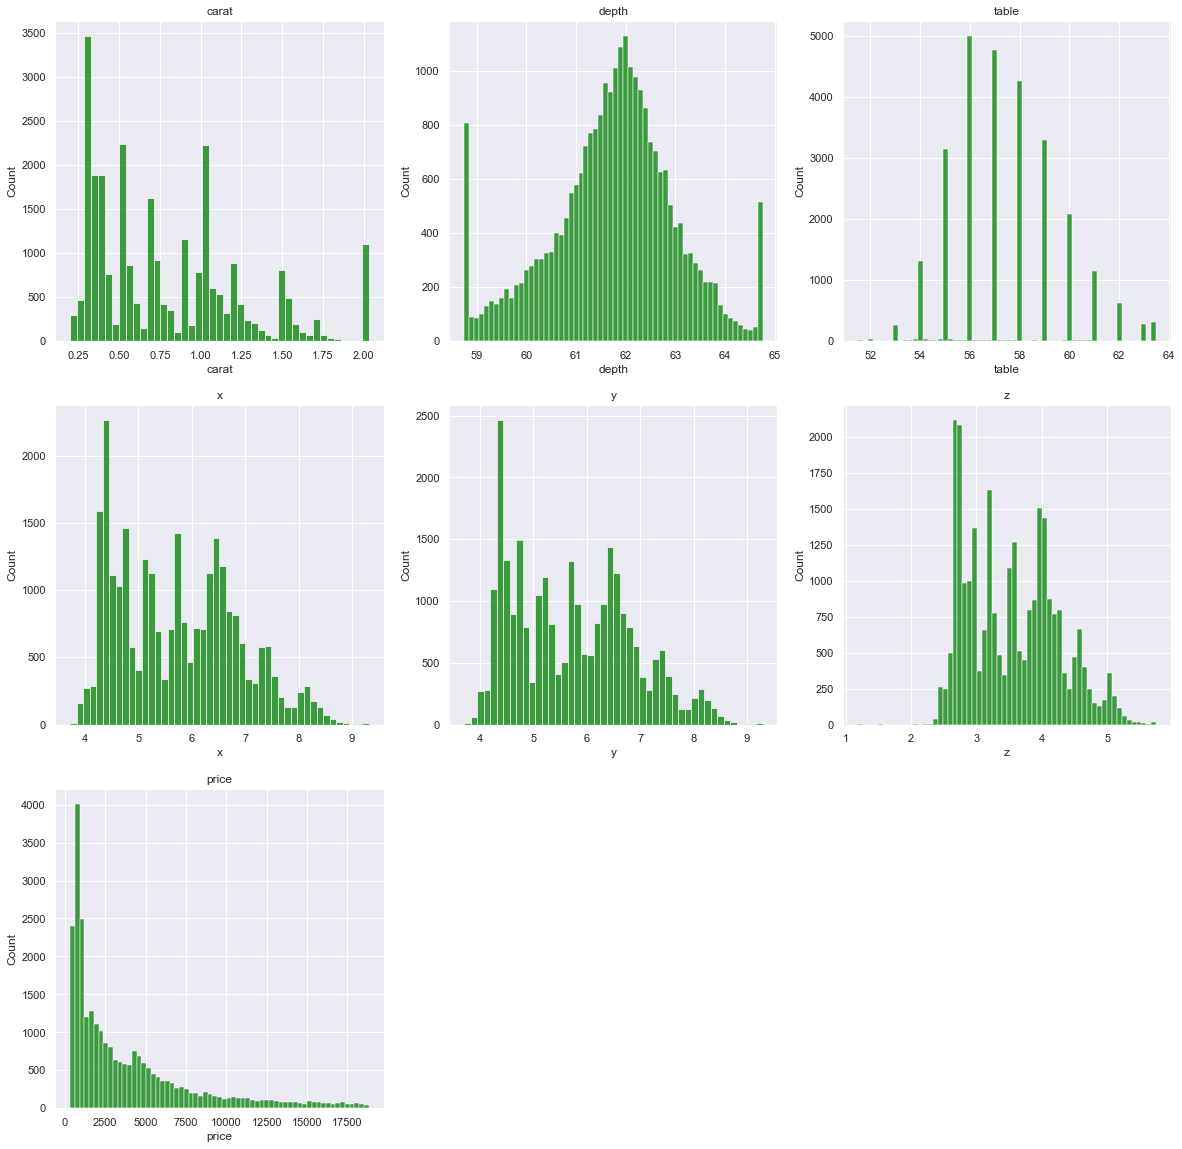

In [49]:
#Plots to see the distribution of the continuous features individually
plt.figure(figsize= (20,20))
distplot_no=1
sns.set(font_scale=1)
no_of_graphs_rows=3
rows=calc_rows(numeric_col_names, no_of_graphs_rows)

for col in cubic_df1.columns :
    if (col in numeric_col_names):
        distplot_title = col
        plt.subplot(rows,no_of_graphs_rows,distplot_no)
        sns.histplot(cubic_df1[col] ,color='green').set(title =distplot_title)
        distplot_no = distplot_no + 1 

In [50]:
for column in cubic_df1.columns:
    if cubic_df1[column].dtype != 'object':
        median = cubic_df1[column].median()
        cubic_df1[column] = cubic_df1[column].fillna(median)    
        
cubic_df1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Impute the Non-Object values using Median

In [51]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0)
imputer= imputer.fit(cubic_df1[numeric_col_names])

In [52]:
cubic_df1[numeric_col_names]=imputer.transform(cubic_df1[numeric_col_names])

In [53]:
cubic_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.5+ MB


In [54]:
missing_check(cubic_df1)

Total  Percent
price        0      0.0
z            0      0.0
y            0      0.0
x            0      0.0
table        0      0.0
depth        0      0.0
clarity      0      0.0
color        0      0.0
cut          0      0.0
carat        0      0.0

### Inference :
    
    Now we can see that there are no null values

In [55]:
cubic_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.5+ MB


### Is Scaling necessary

Scaling is not required for the linear regression model. scaling centers the data but it would not affect the accurcay or residual errors. Coefficients/intercepts value may change due to centring of data but error would not be affected by the scaling. Hence its not required here.

### Log transformation of price

Since price columns has outliers and have extreme values. It would be better if we proceed with the log transformation of price column, it would reduce the skewness of the dependent variable

In [56]:
# Transform an attribute using a mathematical transformation.
# We might want to do that to change the distribution shape of the data
from sklearn.preprocessing import FunctionTransformer   

log_transformer = FunctionTransformer(np.log1p,inverse_func=np.exp)

log_transformer

FunctionTransformer(func=<ufunc 'log1p'>, inverse_func=<ufunc 'exp'>)

In [57]:
cubic_df1['log_price'] = log_transformer.fit_transform(cubic_df1[['price']])

In [58]:
cubic_df1

carat        cut color clarity  depth  table     x     y     z   price  \
1       0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66   499.0   
2       0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70   984.0   
3       0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78  6289.0   
4       0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96  1082.0   
5       0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65   779.0   
...      ...        ...   ...     ...    ...    ...   ...   ...   ...     ...   
26963   1.11    Premium     G     SI1   62.3   58.0  6.61  6.52  4.09  5408.0   
26964   0.33      Ideal     H      IF   61.9   55.0  4.44  4.42  2.74  1114.0   
26965   0.51    Premium     E     VS2   61.7   58.0  5.12  5.15  3.17  1656.0   
26966   0.27  Very Good     F    VVS2   61.8   56.0  4.19  4.20  2.60   682.0   
26967   1.25    Premium     J     SI1   62.0   58.0  6.90  6.88  4.27  5166.0   

       log_price  
1       6.214608  
2       6.892642  
3       8.746716  
4       6.987490  
5       6.659294  
...          ...  
26963   8.595820  
26964   7.016610  
26965   7.412764  
26966   6.526495  
26967   8.550048  

[26933 rows x 11 columns]

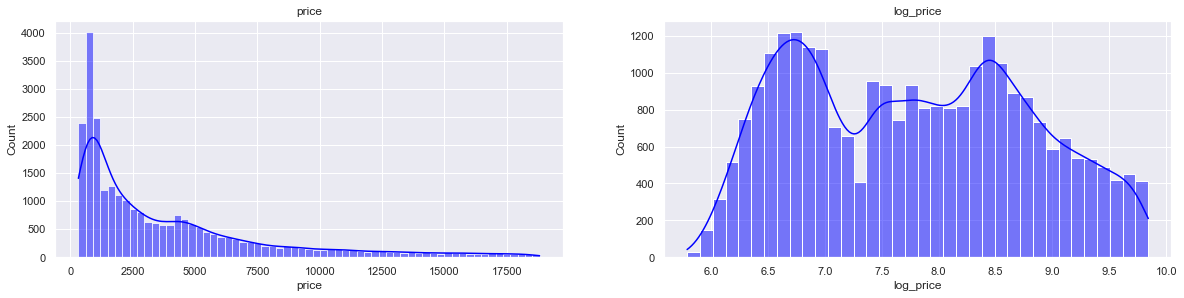

In [59]:
#Plots to see the distribution of the continuous features individually
plt.figure(figsize= (20,20))
distplot_no=1
sns.set(font_scale=1)
no_of_graphs_rows=2
rows=calc_rows(numeric_col_names, no_of_graphs_rows)
col_names = ['price','log_price']
for col in cubic_df1.columns :
    if (col in col_names):
        distplot_title = col
        plt.subplot(rows,no_of_graphs_rows,distplot_no)
        sns.histplot(cubic_df1[col] ,kde=True,color='blue').set(title =distplot_title)
        distplot_no = distplot_no + 1

### Inference :
    
    We can see that although price and log_price both are not normal but steep value(huge spike) have been reduced in log_price graph. Data is more evenly distributed in log_price as compared to price graph

In [60]:
print ('Skew of log price :-', cubic_df1.log_price.skew().round(2))
print ('Skew of price :-', cubic_df1.price.skew().round(2))

Skew of log price :- 0.13
Skew of price :- 1.62


### Inference :
    
We can see that skewness has reduced in log transformation

### Bi-variate, and multivariate analysis

### Checking the unique values for categorical variables

In [61]:
for column in cubic_df1.columns:
    if cubic_df1[column].dtype == 'object':
        print(column,': ',cubic_df1[column].nunique())
        print(cubic_df1[column].value_counts().sort_values())
        print('\n')

cut :  5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


color :  7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5653
Name: color, dtype: int64


clarity :  8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




### Bar Plots

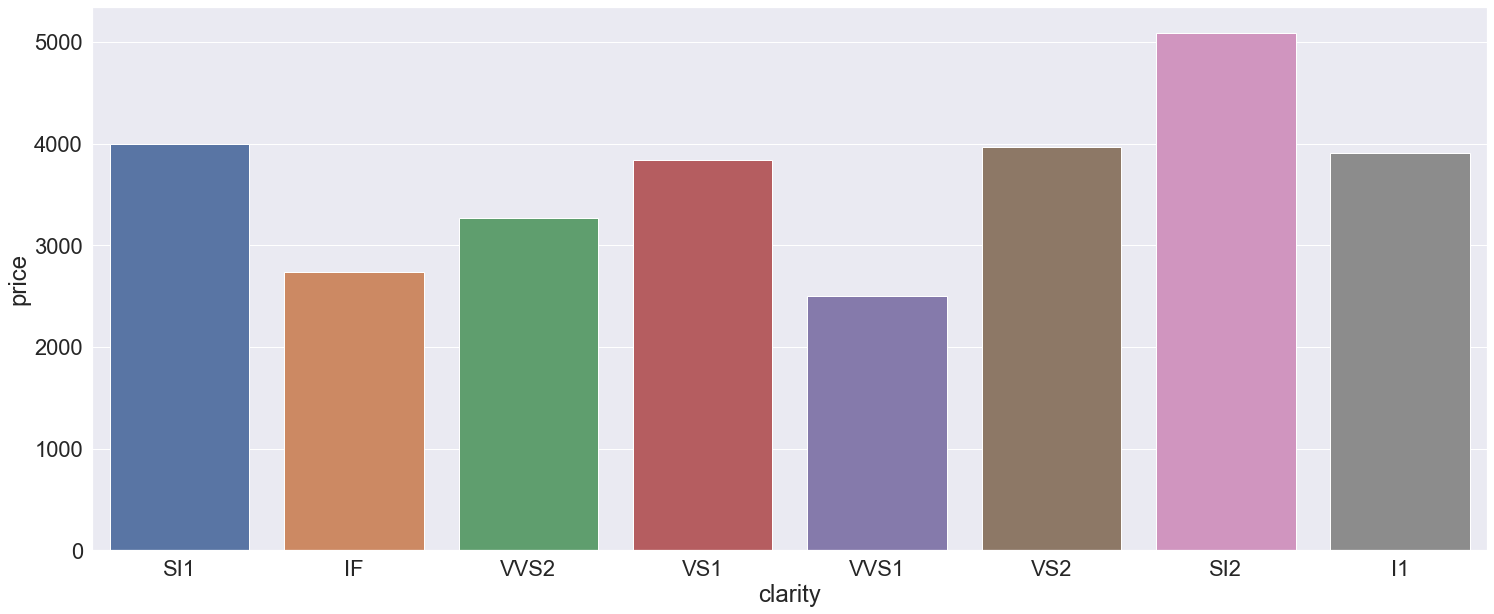

In [62]:
plt.figure(figsize=(25,10))
sns.set(font_scale=2)
g=sns.barplot( 
               y="price",
               x="clarity",ci=False, 
               data=cubic_df1)

### Inference :
    
    We can see that the mean price level is higheest for SI2 clarity and its lowest for VVS1

Important thing to notice here is that IF is second best clarity quality but still its mean price is among the lower side. Best clarity quality 'FL' data is not present

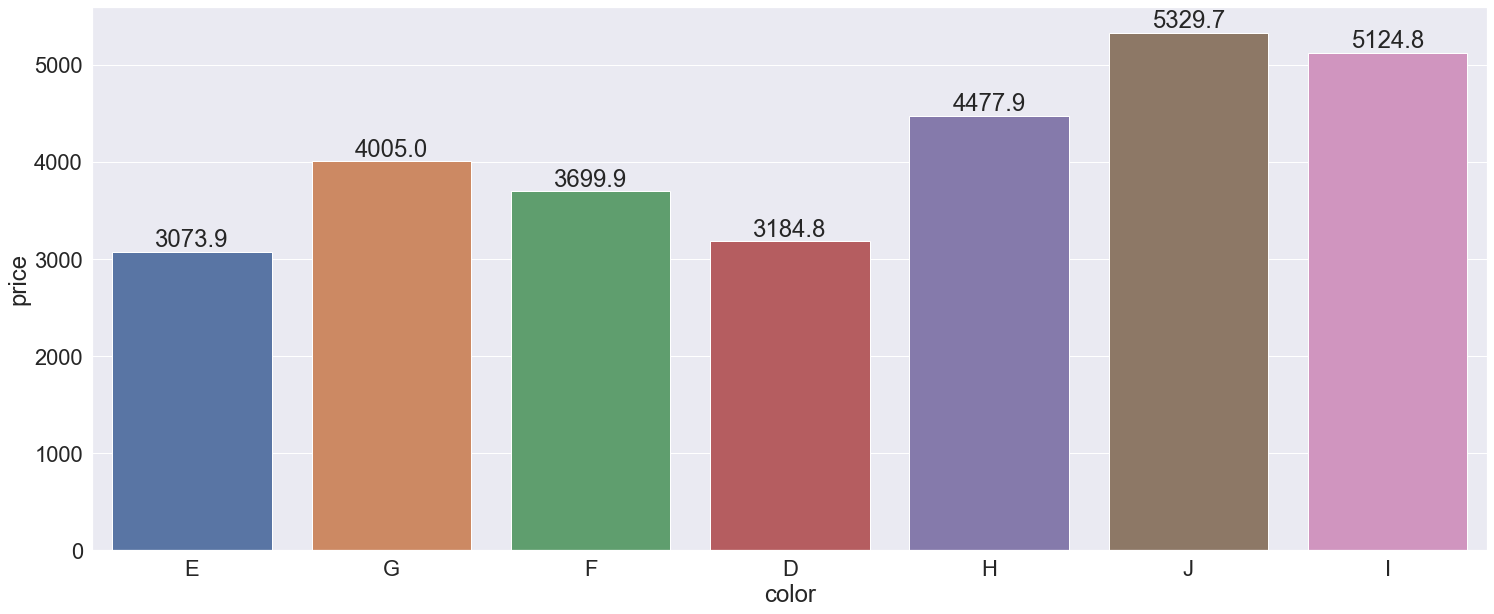

In [63]:
plt.figure(figsize=(25,10))

splot=sns.barplot(y="price", x="color",ci=False, data=cubic_df1);
sns.set(font_scale=2)
# adding annotation in graph   
for p in splot.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    splot.annotate('{:.1f}'.format(y), (x.mean(), y),ha='center', va='bottom')

### Inference :

Price is lowest for color E and its highest for color l

Here too, best color 'D' is also among the lower price range.

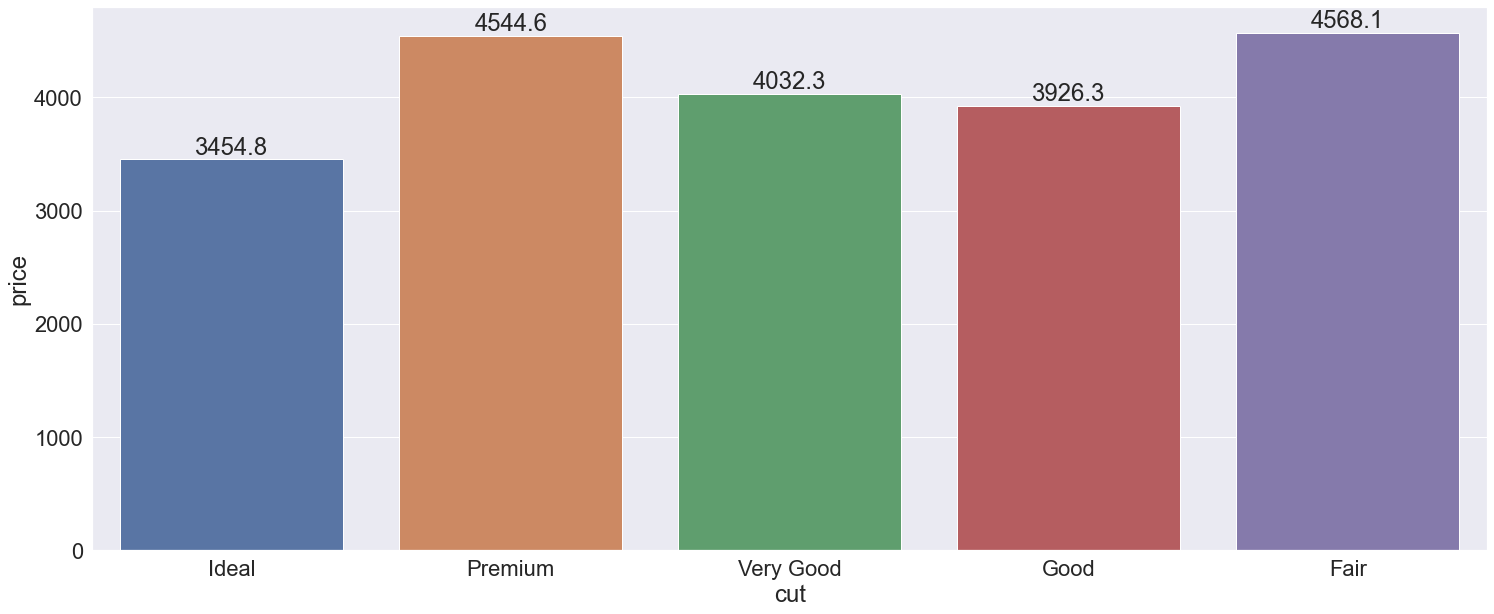

In [64]:
plt.figure(figsize=(25,10))

splot=sns.barplot(y="price", x="cut",ci=False, data=cubic_df1);
sns.set(font_scale=2)
# adding annotation in graph   
for p in splot.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    splot.annotate('{:.1f}'.format(y), (x.mean(), y),ha='center', va='bottom')

### Inference :
    
Here too , best quality cut 'Ideal' has the lowest mean price

### Correlation matrix

In [65]:
Cor=cubic_df1.corr().round(2)
Cor

carat  depth  table     x     y     z  price  log_price
carat       1.00   0.03   0.19  0.98  0.98  0.98   0.92       0.93
depth       0.03   1.00  -0.29 -0.02 -0.02  0.09  -0.00       0.00
table       0.19  -0.29   1.00  0.20  0.19  0.16   0.13       0.16
x           0.98  -0.02   0.20  1.00  1.00  0.99   0.89       0.96
y           0.98  -0.02   0.19  1.00  1.00  0.99   0.89       0.96
z           0.98   0.09   0.16  0.99  0.99  1.00   0.88       0.96
price       0.92  -0.00   0.13  0.89  0.89  0.88   1.00       0.90
log_price   0.93   0.00   0.16  0.96  0.96  0.96   0.90       1.00

### Heat Map

<AxesSubplot:>

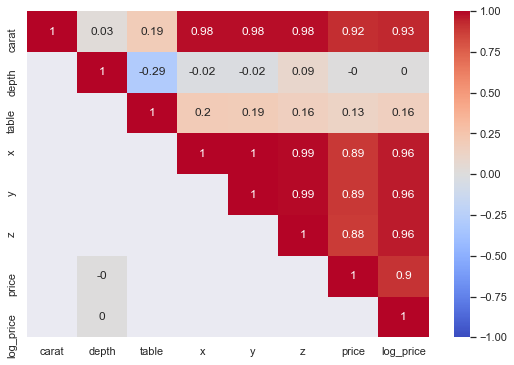

In [66]:
## Correlation Matrix
sns.set(font_scale=1)
plt.figure(figsize=(9 ,6))
mask = np.array(Cor)
mask[np.triu_indices_from(mask)] =False
sns.heatmap(data =Cor, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='coolwarm')

### Inference :
    
    We can see in heatmap & correlation matrix that

        Price has strong correlation with length , width height , carat.

        There is no correlation of depth on price. It has slighly negative correlation with table attribute

        Carat, length, width, height has strong correlation with each other . This means independent attributes have correlation with each other
        
        Thus this dataset has multicolinearity problem

### Pairplot

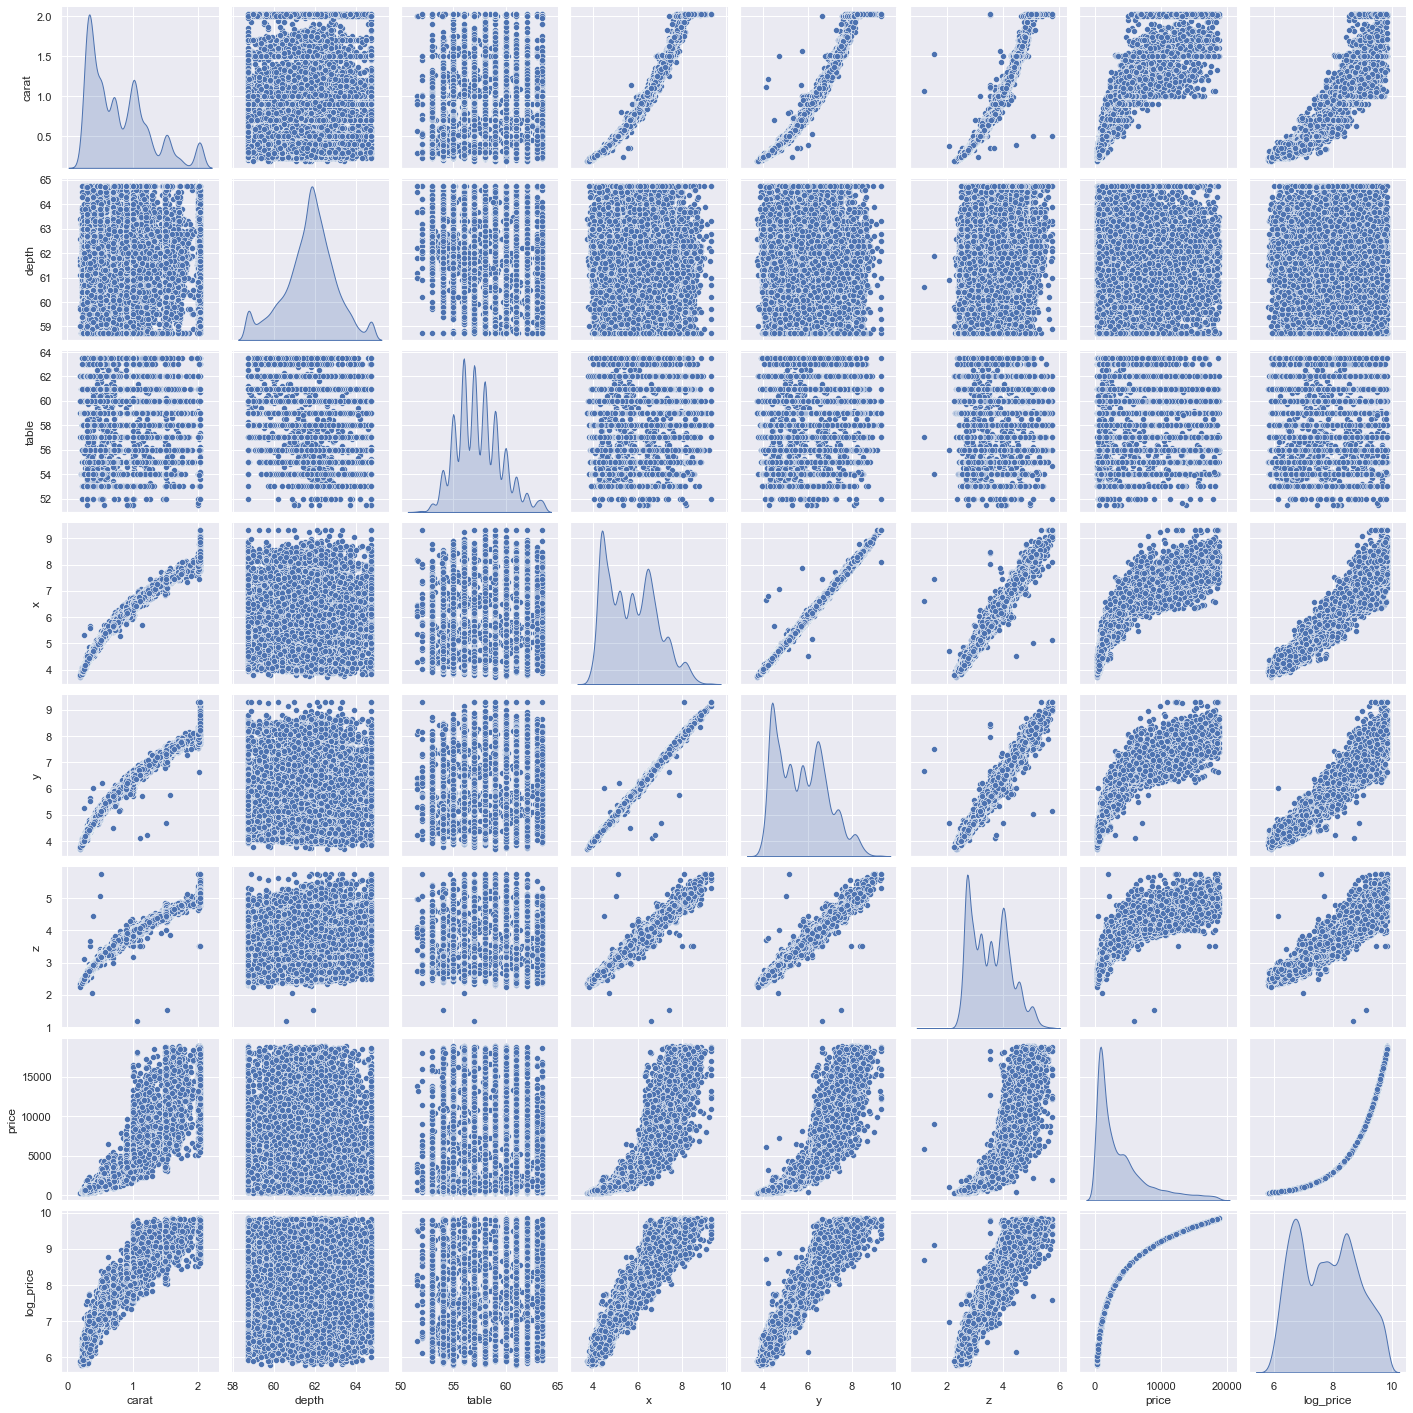

In [67]:
sns.pairplot (cubic_df1,diag_kind='kde')

### Inference :
    
    As depicted in heat map of correlation matrix, we can see that price increases with increase in carat, x,y,z. Carat weight and length, width and height appears to have some structural correlation. As size of zirconium increases, its carat weight increases and if carat weight increases then its length/width/height should also increase

In distribution of carat, x, y & z there are multiple peaks. So it appears different class of data is present in these columns

Another important thing to notice here is that for table and depth there appears to be no correlation with price. We need to check whether these attributes have evidence to show that there is any relationship of price with these attributes

### VIF Checking for Multicollinearity

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
def checkvif(X):
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print (vif)

In [70]:
X = cubic_df1[['carat','table','x','y','z','depth']]
checkvif(X)

  Variables           VIF
0     carat    117.290747
1     table    696.217447
2         x  10214.077576
3         y   9247.015287
4         z   2601.306261
5     depth    931.535862


### Inference :
    
    We can see that VIF is greator than 5 for all the columns. Hence all these independent columns are highly correlated with each ither and this data has a multicollinearity problem

### Removing x and then checking the VIF

In [71]:
X = cubic_df1[['carat','table','y','z','depth']]
checkvif(X)

  Variables          VIF
0     carat   115.453366
1     table   655.889207
2         y  2021.917644
3         z  2433.025133
4     depth   911.203786


### Removing z and then checking the VIF

In [72]:
X = cubic_df1[['carat','table','y','depth']]
checkvif(X)

  Variables         VIF
0     carat   92.408862
1     table  517.696218
2         y  647.570069
3     depth  526.038654


### Removing y and then checking the VIF

In [73]:
X = cubic_df1[['carat','depth','table']]
checkvif(X)

  Variables         VIF
0     carat    4.048380
1     depth  446.207901
2     table  454.949118


### Removing table and then checking the VIF

In [74]:
X = cubic_df1[['carat','depth']]
checkvif(X)

  Variables       VIF
0     carat  3.946744
1     depth  3.946744


### Inference :
    
    Now we can see that there is no mutlicollinearity in the dataset

### Converting categorical to numeric variables

In [75]:
# Creating a copy of the dataset
df1_cpy=cubic_df1.copy()

In [76]:
cubic_df1.cut.replace(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],[0,1,2,3,4],inplace=True )
cubic_df1.color.replace(['D', 'E', 'F', 'G', 'H', 'I', 'J',],[6,5,4,3,2,1,0],inplace=True )
cubic_df1.clarity.replace(['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'],[10,9,8,7,6,5,4,3,2,1,0],inplace=True )

In [77]:
cubic_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 1 to 26967
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      26933 non-null  float64
 1   cut        26933 non-null  int64  
 2   color      26933 non-null  int64  
 3   clarity    26933 non-null  int64  
 4   depth      26933 non-null  float64
 5   table      26933 non-null  float64
 6   x          26933 non-null  float64
 7   y          26933 non-null  float64
 8   z          26933 non-null  float64
 9   price      26933 non-null  float64
 10  log_price  26933 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 3.7 MB


### Inference :
    
    We can see that all the attributes are numerical now

#### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [166]:
cubic_df1.head()

carat  cut  color  clarity  depth  table     x     y     z   price  \
1   0.30    4      5        4   62.1   58.0  4.27  4.29  2.66   499.0   
2   0.33    3      3        9   60.8   58.0  4.42  4.46  2.70   984.0   
3   0.90    2      5        7   62.2   60.0  6.04  6.12  3.78  6289.0   
4   0.42    4      4        6   61.6   56.0  4.82  4.80  2.96  1082.0   
5   0.31    4      4        8   60.4   59.0  4.35  4.43  2.65   779.0   

   log_price  
1   6.214608  
2   6.892642  
3   8.746716  
4   6.987490  
5   6.659294

In [167]:
cubic_df1.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price', 'log_price'],
      dtype='object')

### Train-Test Split

In [78]:
# Copy all the predictor variables into X dataframe
X = cubic_df1.drop(['log_price'], axis=1)
#X = df1[['carat','depth']]

# Copy target into the y dataframe. 
y = cubic_df1[['log_price']]

In [79]:
X.head()

carat  cut  color  clarity  depth  table     x     y     z   price
1   0.30    4      5        4   62.1   58.0  4.27  4.29  2.66   499.0
2   0.33    3      3        9   60.8   58.0  4.42  4.46  2.70   984.0
3   0.90    2      5        7   62.2   60.0  6.04  6.12  3.78  6289.0
4   0.42    4      4        6   61.6   56.0  4.82  4.80  2.96  1082.0
5   0.31    4      4        8   60.4   59.0  4.35  4.43  2.65   779.0

In [80]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [81]:
X_train_cpy = X_train.copy()
X_test_cpy = X_test.copy()

In [82]:
X_train = X_train.drop(['price'], axis=1)
X_test = X_test.drop(['price'], axis=1)

In [83]:
rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

### Linear Regression Model

In [84]:
# Invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [85]:
# explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is -1.0202873340043639
The coefficient for cut is 0.026650203007287043
The coefficient for color is 0.08029557576207391
The coefficient for clarity is 0.12128135115597713
The coefficient for depth is 0.04797794002096869
The coefficient for table is 0.009963356132641737
The coefficient for x is 0.737258951531741
The coefficient for y is 0.45437413118636005
The coefficient for z is 0.3193892009319368


In [86]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -3.8642342873615387


In [87]:
# R square on training data
regression_model.score(X_train, y_train)

0.9763153115042822

In [88]:
scores_train.append(regression_model.score(X_train, y_train))

### Inference :

Around 97% of the variation in the zirconium price is explained by the predictors in the model for train set

In [89]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9759279412402047

In [90]:
scores_test.append(regression_model.score(X_test, y_test))

around 97% of the variation in the zirconium price is explained for test data set too

In [91]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
#np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

In [92]:
X_train_cpy["predicted_LR"] = log_transformer.inverse_transform(predicted_train)
X_train_cpy

carat  cut  color  clarity  depth  table     x     y     z   price  \
22115   0.34    2      2        5   62.4   60.0  4.41  4.44  2.76   537.0   
2276    0.30    4      5        5   61.2   55.0  4.35  4.31  2.65   844.0   
19184   0.50    4      3        4   62.5   57.0  5.09  5.05  3.17  1240.0   
5031    1.10    1      5        3   63.3   56.0  6.53  6.58  4.15  4065.0   
25415   1.02    3      4        3   61.1   62.0  6.54  6.49  3.98  4057.0   
...      ...  ...    ...      ...    ...    ...   ...   ...   ...     ...   
10963   0.29    4      3        9   61.3   55.0  4.25  4.28  2.61   673.0   
17305   0.70    4      0        6   61.6   57.0  5.72  5.77  3.54  1657.0   
5194    1.22    3      1        6   60.6   61.0  6.94  6.88  4.19  6354.0   
12180   1.03    0      6        4   64.4   61.0  6.33  6.25  4.05  4845.0   
236     1.21    3      2        9   62.2   58.0  6.83  6.80  4.24  8446.0   

       predicted_LR  
22115    573.087535  
2276     626.538235  
19184   1193.289112  
5031    5064.047015  
25415   4679.565240  
...             ...  
10963    796.010229  
17305   2318.564710  
5194    7151.584677  
12180   5164.308167  
236    10666.117713  

[18853 rows x 11 columns]

In [93]:
np.sqrt(metrics.mean_squared_error(X_train_cpy['price'],X_train_cpy["predicted_LR"]))

1763.6858523972955

In [94]:
rmse_train.append(np.sqrt(metrics.mean_squared_error(X_train_cpy['price'],X_train_cpy["predicted_LR"])))

In [95]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
#np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

In [96]:
X_test_cpy["predicted_LR"] = log_transformer.inverse_transform(predicted_test)
X_test_cpy

carat  cut  color  clarity  depth  table     x     y     z    price  \
16998   1.26    3      1        4  60.50   62.0  6.97  6.92  4.20   5292.0   
24458   0.90    2      3        5  58.75   59.0  6.35  6.36  3.72   4484.0   
16613   1.37    4      4        6  59.60   57.0  7.28  7.22  4.32  11649.0   
309     0.84    1      3        6  63.60   57.0  5.98  5.93  3.79   3316.0   
26653   2.00    2      0        5  60.80   62.0  8.09  8.12  4.93  13043.0   
...      ...  ...    ...      ...    ...    ...   ...   ...   ...      ...   
25017   0.34    4      5        6  61.20   57.0  4.51  4.45  2.74   1033.0   
8486    1.01    2      5        5  62.20   58.0  6.36  6.41  3.97   6522.0   
26892   1.01    3      1        5  62.50   58.0  6.39  6.44  4.01   4592.0   
17456   1.01    1      2        4  60.30   63.5  6.53  6.50  3.93   4642.0   
26170   1.02    3      2        4  61.90   61.0  6.42  6.34  3.95   4558.0   

       predicted_LR  
16998   5655.406315  
24458   3960.733971  
16613  11480.756377  
309     3666.489244  
26653  13605.326693  
...             ...  
25017    854.849313  
8486    5421.041915  
26892   4300.253071  
17456   4131.176565  
26170   3920.054410  

[8080 rows x 11 columns]

In [97]:
np.sqrt(metrics.mean_squared_error(X_test_cpy['price'],X_test_cpy["predicted_LR"]))

1597.3490579838178

In [98]:
rmse_test.append(np.sqrt(metrics.mean_squared_error(X_test_cpy['price'],X_test_cpy["predicted_LR"])))

In [99]:
X_train_cpy[X_train_cpy['predicted_LR']<0]

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price, predicted_LR]
Index: []

In [100]:
X_test_cpy[X_test_cpy['predicted_LR']<0]

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price, predicted_LR]
Index: []

### Inference :
    
    We can see no negative predictions in test dataset

### Linear Regression using statsmodels

In [101]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train_cpy, y_train], axis=1)
data_train = data_train.drop('predicted_LR',axis=1)
data_test=pd.concat([X_test_cpy,y_test],axis=1)
data_test = data_test.drop('predicted_LR',axis=1)
data_train.head()

carat  cut  color  clarity  depth  table     x     y     z   price  \
22115   0.34    2      2        5   62.4   60.0  4.41  4.44  2.76   537.0   
2276    0.30    4      5        5   61.2   55.0  4.35  4.31  2.65   844.0   
19184   0.50    4      3        4   62.5   57.0  5.09  5.05  3.17  1240.0   
5031    1.10    1      5        3   63.3   56.0  6.53  6.58  4.15  4065.0   
25415   1.02    3      4        3   61.1   62.0  6.54  6.49  3.98  4057.0   

       log_price  
22115   6.287859  
2276    6.739337  
19184   7.123673  
5031    8.310415  
25415   8.308446

In [102]:
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price', 'log_price'],
      dtype='object')

In [103]:
expr= 'log_price ~  carat + cut + color+clarity +depth + table + x + y + z  '

In [104]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept   -3.864234
carat       -1.020287
cut          0.026650
color        0.080296
clarity      0.121281
depth        0.047978
table        0.009963
x            0.737259
y            0.454374
z            0.319389
dtype: float64

In [105]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 8.630e+04
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:56:40   Log-Likelihood:                 8202.1
No. Observations:               18853   AIC:                        -1.638e+04
Df Residuals:                   18843   BIC:                        -1.631e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8642      0.137    -28.226      0.0

### Inference :
    
    The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [108]:
# Calculate MSE for train
mse = np.mean((log_transformer.inverse_transform(lm1.predict(data_train.drop('log_price',axis=1)))-data_train['price'])**2)

In [109]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

1763.6858523970923

In [110]:
# Prediction on Test data
y_pred = log_transformer.inverse_transform(lm1.predict(data_test))

In [111]:
# Calculate MSE for test
mse = np.mean((log_transformer.inverse_transform(lm1.predict(data_test.drop('log_price',axis=1)))-data_test['price'])**2)

In [112]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

1597.3490579836368

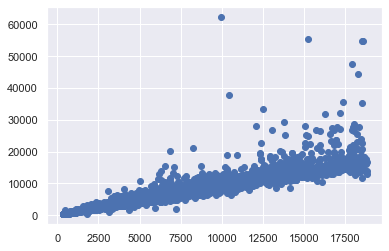

In [113]:
plt.scatter(data_test['price'], y_pred)
plt.show()

In [114]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-3.86) * Intercept + (-1.02) * carat + (0.03) * cut + (0.08) * color + (0.12) * clarity + (0.05) * depth + (0.01) * table + (0.74) * x + (0.45) * y + (0.32) * z + 

### Performing PCA

### Scaling

In [115]:
ss=StandardScaler() 

In [116]:
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(X_train)
x_test_scaled=ss.transform(X_test)
print (x_train_scaled.shape)
print (X_train.shape)
print (x_test_scaled.shape)
print (X_test.shape)

(18853, 9)
(18853, 9)
(8080, 9)
(8080, 9)


In [117]:
x_train_scaled[0]

array([-0.98333162, -0.8264737 , -0.81908314, -0.03462647,  0.5312116 ,
        1.19410878, -1.17626173, -1.15924109, -1.12166084])

In [118]:
X_train

carat  cut  color  clarity  depth  table     x     y     z
22115   0.34    2      2        5   62.4   60.0  4.41  4.44  2.76
2276    0.30    4      5        5   61.2   55.0  4.35  4.31  2.65
19184   0.50    4      3        4   62.5   57.0  5.09  5.05  3.17
5031    1.10    1      5        3   63.3   56.0  6.53  6.58  4.15
25415   1.02    3      4        3   61.1   62.0  6.54  6.49  3.98
...      ...  ...    ...      ...    ...    ...   ...   ...   ...
10963   0.29    4      3        9   61.3   55.0  4.25  4.28  2.61
17305   0.70    4      0        6   61.6   57.0  5.72  5.77  3.54
5194    1.22    3      1        6   60.6   61.0  6.94  6.88  4.19
12180   1.03    0      6        4   64.4   61.0  6.33  6.25  4.05
236     1.21    3      2        9   62.2   58.0  6.83  6.80  4.24

[18853 rows x 9 columns]

#### Train and test dataframe have been scaled now

### 1. Bartlett Test of Sphericity

Compares your correlation matrix (a matrix of Pearson correlations) to the identity matrix.
p-value should be less than 0.05 to proceed for dimension reduction

### Null hypothesis = All the dimensions are equal

### Alternate hypothesis = atleast one dimension is not equal or there is a difference in the dimensions

In [119]:

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(x_train_scaled)
chi_square_value, p_value

(292921.14259061153, 0.0)

### Inference : 
p-value is low...............hence we shall go with alternative hypothesis.It means that dimension reduction is possible in the dataset given

### 2. Kaiser-Meyer-Olkin (KMO) Test

1. KMO Test for Sample Adequacy

2. KMO values range between 0 and 1. Value of KMO less than 0.5 is considered inadequate.

In [120]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(x_train_scaled)
print(kmo_all,kmo_model)

[0.97926197 0.50582774 0.91697366 0.91264907 0.1362295  0.53860818
 0.80381167 0.79844035 0.78212634] 0.7721386736349197


#### Overall Measure of Sample Adequacy (MSA) is greater than 0.5. Hence we have adequate sample to proceed with PCA

### Use PCA from sklearn's decomposition class and find Principal Components

In [121]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
PC_components_req = 9
pca = PCA(n_components=PC_components_req)
pc=pca.fit_transform(x_train_scaled)
pc_comps = ['PC' + str(i) for i in range(1,PC_components_req+1)]

In [122]:
pca_summ = pd.DataFrame(pc_comps,columns=['PCs'])
pca_summ['Proportion Of Variance'] = np.round(pca.explained_variance_ratio_ * 100,2)
pca_summ['Standard Deviation'] = np.round(np.sqrt(pca.explained_variance_),2)
pca_summ['Cumulative Proportion'] = np.round(np.cumsum(pca.explained_variance_ratio_*100),2)
pca_summ

PCs  Proportion Of Variance  Standard Deviation  Cumulative Proportion
0  PC1                   47.92                2.08                  47.92
1  PC2                   15.53                1.18                  63.46
2  PC3                   13.53                1.10                  76.98
3  PC4                   10.97                0.99                  87.96
4  PC5                    7.76                0.84                  95.71
5  PC6                    3.98                0.60                  99.69
6  PC7                    0.26                0.15                  99.95
7  PC8                    0.03                0.06                  99.99
8  PC9                    0.01                0.04                 100.00

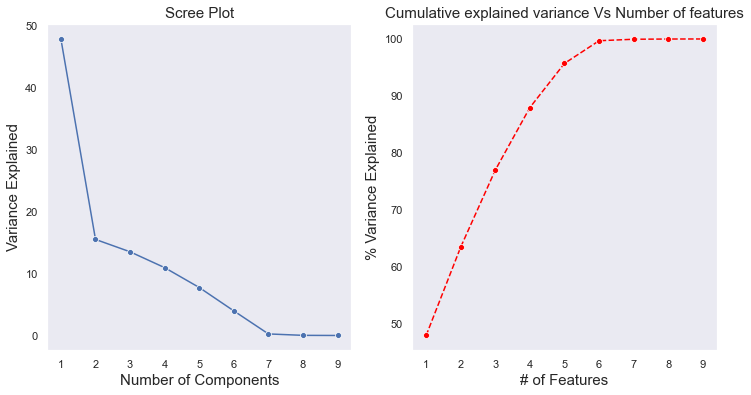

In [123]:
## Plotting the scree plot
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.lineplot(y=pca_summ['Proportion Of Variance'],x=range(1,PC_components_req+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.subplot(1,2,2)

#plt.plot(y=var, x=range(1,len(var)+1),marker='o',linestyle='--',color='red')
sns.lineplot(y=pca_summ['Cumulative Proportion'], x=range(1,PC_components_req+1),marker='o',linestyle='--',color='red')
plt.ylabel('% Variance Explained',fontsize=15)
plt.xlabel('# of Features',fontsize=15)
plt.title('Cumulative explained variance Vs Number of features',fontsize=15)
plt.grid()

From these graphs we can see that if we chose 6 PC's then 99% variance is getting explained and our dimension is getting reduced from 9 to 6.

In [124]:
PC_components_req = 6
pca = PCA(n_components=PC_components_req)
pc_comps = ['PC' + str(i) for i in range(1,PC_components_req+1)]

In [125]:
x_train_pca=pca.fit_transform(x_train_scaled)
x_test_pca=pca.transform(x_test_scaled)
x_train_pca = pd.DataFrame(x_train_pca,columns=pc_comps,index=X_train.index)
x_test_pca = pd.DataFrame(x_test_pca,columns=pc_comps,index=X_test.index)

### Correlation between components and features

In [126]:
df1_comp = pd.DataFrame(pca.components_,columns=list(X_train),index=pc_comps)
df1_comp.round(2)

carat   cut  color  clarity  depth  table     x     y     z
PC1   0.47 -0.11  -0.16    -0.22   0.02   0.13  0.47  0.47  0.47
PC2  -0.09 -0.60   0.19    -0.20  -0.19   0.70 -0.08 -0.08 -0.10
PC3  -0.04 -0.45  -0.00    -0.19   0.84  -0.23 -0.07 -0.08  0.02
PC4  -0.01 -0.21  -0.80     0.53   0.05   0.18 -0.04 -0.04 -0.04
PC5   0.13 -0.17   0.55     0.77   0.12   0.02  0.11  0.12  0.13
PC6  -0.01 -0.59  -0.03    -0.02  -0.49  -0.64  0.03  0.04 -0.02

PC1 : 0.43 * carat -0.09 * cut - 0.14 color - 0.19 *clarity + 0.01 * depth + 0.11 * table + 0.43 *x + 0.43 *y + 0.43z

PC5 : -0.01 * carat -0.59 * cut - 0.03 color - 0.02 *clarity - 0.49 * depth - 0.64 * table + 0.03 *x + 0.04 *y - 0.02z

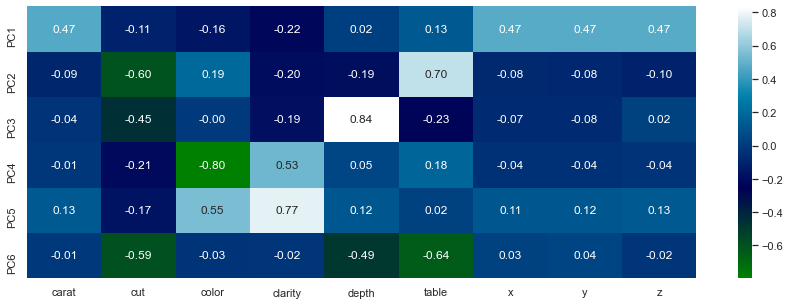

In [127]:
plt.figure(figsize=(15,5))
sns.heatmap(df1_comp,cmap='ocean',annot=True,fmt='.2f',yticklabels=pc_comps)
plt.show()

### Inference :
    
    We can see that PC1 is a combination of Carat and its length, width , height PC2 is a combination of table and cut

In [128]:
# creating dataframe of PC scores
print (x_train_pca.shape)
print (x_test_pca.shape)

(18853, 6)
(8080, 6)


### Checking correlation of dataset after PCA dimension reduction

In [129]:
pd.concat([x_train_pca,x_test_pca], axis=0).corr().round(2)

PC1   PC2  PC3   PC4   PC5   PC6
PC1  1.0 -0.00 -0.0 -0.00 -0.00  0.00
PC2 -0.0  1.00  0.0 -0.00  0.01  0.00
PC3 -0.0  0.00  1.0  0.00  0.00 -0.00
PC4 -0.0 -0.00  0.0  1.00 -0.00  0.01
PC5 -0.0  0.01  0.0 -0.00  1.00 -0.00
PC6  0.0  0.00 -0.0  0.01 -0.00  1.00

### Inference :
    
We can see that correlation is 0 for off diagonal elements. Hence multicollinearity has been removed

### Checking VIF

In [216]:
checkvif(pd.concat([x_train_pca,x_test_pca], axis=0))

  Variables       VIF
0       PC1  1.000028
1       PC2  1.000017
2       PC3  1.000078
3       PC4  1.000045
4       PC5  1.000069
5       PC6  1.000028


### Inference :
    
We can see that VIF is 1 for all the PC's. Hence multicolinearity has been removed.

### Linear Regression Model after PCA

In [130]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(x_train_pca, y_train)

LinearRegression()

In [131]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(x_train_pca.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for PC1 is 0.450211400757333
The coefficient for PC2 is -0.11685823373711156
The coefficient for PC3 is -0.08450759301734515
The coefficient for PC4 is -0.059037742690767496
The coefficient for PC5 is 0.35551846447377267
The coefficient for PC6 is -0.029623295753423658


In [132]:

# Let us check the intercept for the model
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 7.783340582033334


In [133]:
# R square on training data
regression_model.score(x_train_pca, y_train)

0.9598691080691446

In [134]:
scores_train.append(regression_model.score(x_train_pca, y_train))

### Inference :
    
    Around 95% of the variation in the zirconium price is explained by the predictors in the model for train set

In [135]:
# R square on testing data
regression_model.score(x_test_pca, y_test)

0.9579513261268165

In [136]:
scores_test.append(regression_model.score(x_test_pca, y_test))

### Inference :
    
    Around 95% of the variation in the zirconium price is explained for test data set too.

In [137]:
#RMSE on Training data
predicted_train=regression_model.fit(x_train_pca, y_train).predict(x_train_pca)
#np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

In [138]:
X_train_cpy["predicted_LR_PCA"] = log_transformer.inverse_transform(predicted_train)
X_train_cpy

carat  cut  color  clarity  depth  table     x     y     z   price  \
22115   0.34    2      2        5   62.4   60.0  4.41  4.44  2.76   537.0   
2276    0.30    4      5        5   61.2   55.0  4.35  4.31  2.65   844.0   
19184   0.50    4      3        4   62.5   57.0  5.09  5.05  3.17  1240.0   
5031    1.10    1      5        3   63.3   56.0  6.53  6.58  4.15  4065.0   
25415   1.02    3      4        3   61.1   62.0  6.54  6.49  3.98  4057.0   
...      ...  ...    ...      ...    ...    ...   ...   ...   ...     ...   
10963   0.29    4      3        9   61.3   55.0  4.25  4.28  2.61   673.0   
17305   0.70    4      0        6   61.6   57.0  5.72  5.77  3.54  1657.0   
5194    1.22    3      1        6   60.6   61.0  6.94  6.88  4.19  6354.0   
12180   1.03    0      6        4   64.4   61.0  6.33  6.25  4.05  4845.0   
236     1.21    3      2        9   62.2   58.0  6.83  6.80  4.24  8446.0   

       predicted_LR  predicted_LR_PCA  
22115    573.087535        629.752078  
2276     626.538235        734.836990  
19184   1193.289112       1120.634920  
5031    5064.047015       4806.463708  
25415   4679.565240       4106.216857  
...             ...               ...  
10963    796.010229        916.864726  
17305   2318.564710       1935.363273  
5194    7151.584677       6482.909434  
12180   5164.308167       4837.913404  
236    10666.117713       9556.747461  

[18853 rows x 12 columns]

In [139]:
np.sqrt(metrics.mean_squared_error(X_train_cpy['price'],X_train_cpy["predicted_LR_PCA"]))

2127.555047265015

In [140]:
rmse_train.append(np.sqrt(metrics.mean_squared_error(X_train_cpy['price'],X_train_cpy["predicted_LR_PCA"])))

In [141]:
#RMSE on Testing data
predicted_test=regression_model.fit(x_train_pca, y_train).predict(x_test_pca)
#np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

In [142]:
X_test_cpy["predicted_LR_PCA"] = log_transformer.inverse_transform(predicted_test)
X_test_cpy

carat  cut  color  clarity  depth  table     x     y     z    price  \
16998   1.26    3      1        4  60.50   62.0  6.97  6.92  4.20   5292.0   
24458   0.90    2      3        5  58.75   59.0  6.35  6.36  3.72   4484.0   
16613   1.37    4      4        6  59.60   57.0  7.28  7.22  4.32  11649.0   
309     0.84    1      3        6  63.60   57.0  5.98  5.93  3.79   3316.0   
26653   2.00    2      0        5  60.80   62.0  8.09  8.12  4.93  13043.0   
...      ...  ...    ...      ...    ...    ...   ...   ...   ...      ...   
25017   0.34    4      5        6  61.20   57.0  4.51  4.45  2.74   1033.0   
8486    1.01    2      5        5  62.20   58.0  6.36  6.41  3.97   6522.0   
26892   1.01    3      1        5  62.50   58.0  6.39  6.44  4.01   4592.0   
17456   1.01    1      2        4  60.30   63.5  6.53  6.50  3.93   4642.0   
26170   1.02    3      2        4  61.90   61.0  6.42  6.34  3.95   4558.0   

       predicted_LR  predicted_LR_PCA  
16998   5655.406315       5446.519432  
24458   3960.733971       3429.569554  
16613  11480.756377      11317.690586  
309     3666.489244       3166.224387  
26653  13605.326693      19866.883532  
...             ...               ...  
25017    854.849313        949.660002  
8486    5421.041915       5016.737633  
26892   4300.253071       3747.869183  
17456   4131.176565       3587.454370  
26170   3920.054410       3575.322659  

[8080 rows x 12 columns]

In [143]:
np.sqrt(metrics.mean_squared_error(X_test_cpy['price'],X_test_cpy["predicted_LR_PCA"]))

2157.469910837652

In [144]:
rmse_test.append(np.sqrt(metrics.mean_squared_error(X_test_cpy['price'],X_test_cpy["predicted_LR_PCA"])))

In [145]:
X_train_cpy[X_train_cpy['predicted_LR_PCA']<0]

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price, predicted_LR, predicted_LR_PCA]
Index: []

In [146]:
X_test_cpy[X_test_cpy['predicted_LR_PCA']<0]

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price, predicted_LR, predicted_LR_PCA]
Index: []

### Inference :
    
    We can see that there are no negative predictions for test and train data set

### Linear Regression using statsmodels after PCA

In [147]:
# concatenate X and y into a single dataframe
data_train = pd.concat([x_train_pca, y_train], axis=1)
data_test=pd.concat([x_test_pca,y_test],axis=1)
data_train.head()

PC1       PC2       PC3       PC4       PC5       PC6  log_price
22115 -1.701975  1.481623  0.731067  1.200851 -0.793997 -0.551283   6.287859
2276  -2.709139 -0.666717 -0.349456 -1.045178 -0.350557  0.287787   6.739337
19184 -1.061146 -0.552624  0.339556 -0.297121 -1.011561 -0.751228   7.123673
5031   1.684835  0.495947  2.101295 -1.200345  0.352957  0.843023   8.310415
25415  1.680392  1.626652 -0.828339 -0.680780 -0.485291 -1.107583   8.308446

In [148]:
data_train.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'log_price'], dtype='object')

In [149]:
expr= 'log_price ~  PC1 + PC2 + PC3 + PC4 +PC5 + PC6 '

In [150]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept    7.783341
PC1          0.450211
PC2         -0.116858
PC3         -0.084508
PC4         -0.059038
PC5          0.355518
PC6         -0.029623
dtype: float64

In [151]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 7.513e+04
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:05:21   Log-Likelihood:                 3231.3
No. Observations:               18853   AIC:                            -6449.
Df Residuals:                   18846   BIC:                            -6394.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7833      0.001   5241.414      0.0

### Inference :
    
The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

p value for all the attributes is less than 0.05. Hence all are affecting the price of zirconium

In [152]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(7.78) * Intercept + (0.45) * PC1 + (-0.12) * PC2 + (-0.08) * PC3 + (-0.06) * PC4 + (0.36) * PC5 + (-0.03) * PC6 + 

### Inference :

Here we can see that PC1 (explaining maximum variance of independent variables) is a majorly a combination of Carat and its length , width , height. Overall we can see a positive impact on the price due to this factor. As thhe PC1 increases , log price also increases.

In [240]:
from mpl_toolkits import mplot3d

Text(0.5, 0.92, 'Scatter plot of Width vs Carat vs Price')

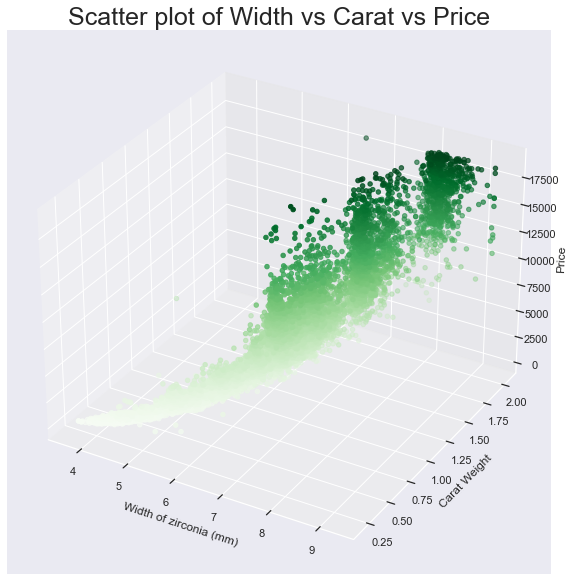

In [153]:
fig = plt.figure(figsize=(20,10))
sns.set(font_scale=1)
ax = plt.axes(projection='3d')
ax.scatter3D(X_train_cpy['y'], X_train_cpy['carat'], X_train_cpy['price'], c=X_train_cpy['price'],cmap='Greens')
ax.set(xlabel = "Width of zirconia (mm)",ylabel="Carat Weight",zlabel="Price")
ax.set_title("Scatter plot of Width vs Carat vs Price",fontsize=25)

In [154]:
X_train_cpy.describe()

carat           cut         color       clarity         depth  \
count  18853.000000  18853.000000  18853.000000  18853.000000  18853.000000   
mean       0.792753      2.914337      3.395481      5.057073     61.744205   
std        0.460440      1.106341      1.703756      1.648296      1.234559   
min        0.200000      0.000000      0.000000      2.000000     58.750000   
25%        0.400000      2.000000      2.000000      4.000000     61.100000   
50%        0.700000      3.000000      3.000000      5.000000     61.800000   
75%        1.050000      4.000000      5.000000      6.000000     62.500000   
max        2.030000      4.000000      6.000000      9.000000     64.750000   

              table             x             y             z         price  \
count  18853.000000  18853.000000  18853.000000  18853.000000  18853.000000   
mean      57.428351      5.729531      5.731441      3.537587   3934.007532   
std        2.153671      1.121830      1.114070      0.693265   4009.563895   
min       51.500000      3.730000      3.710000      1.530000    326.000000   
25%       56.000000      4.710000      4.720000      2.900000    950.000000   
50%       57.000000      5.690000      5.700000      3.520000   2368.000000   
75%       59.000000      6.550000      6.550000      4.040000   5378.000000   
max       63.500000      9.310000      9.290000      5.750000  18804.000000   

       predicted_LR  predicted_LR_PCA  
count  18853.000000      18853.000000  
mean    3943.570612       4125.110642  
std     4433.094310       5229.938409  
min      301.987530        386.986542  
25%      975.966018       1014.787658  
50%     2374.098380       2108.338681  
75%     5236.928936       4816.953623  
max    83707.942093      56148.572100

<AxesSubplot:xlabel='y', ylabel='price'>

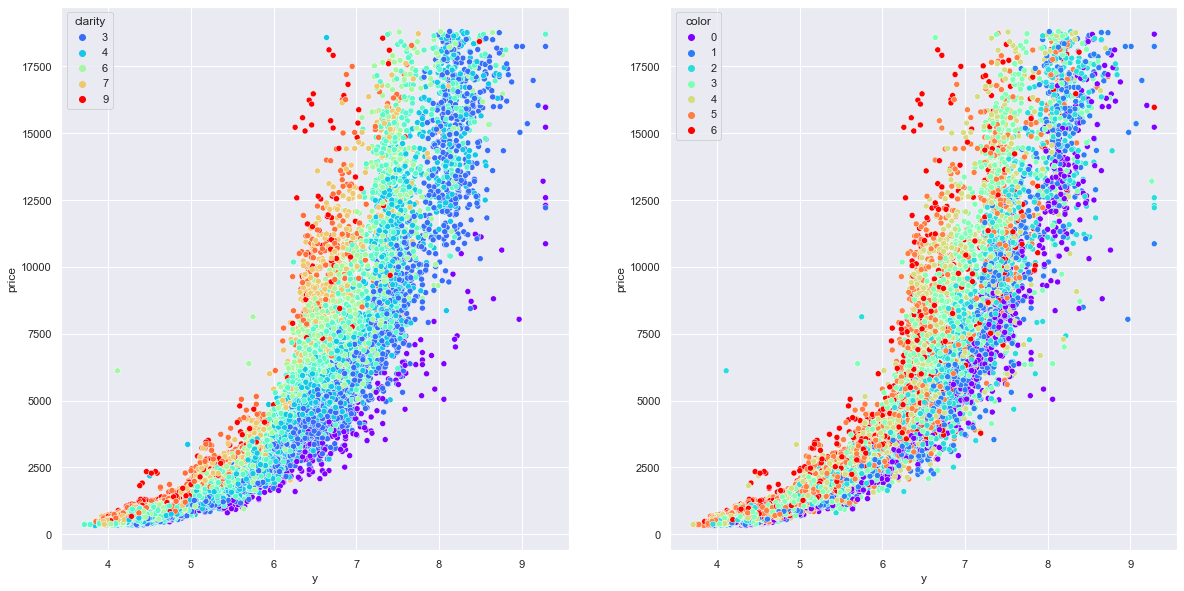

In [155]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.set(font_scale=1)

sns.scatterplot(x=X_train_cpy['y'],y=X_train_cpy['price'],hue=X_train_cpy['clarity'],palette='rainbow')
plt.subplot(1,2,2)
sns.scatterplot(x=X_train_cpy['y'],y=X_train_cpy['price'],hue=X_train_cpy['color'],palette='rainbow')

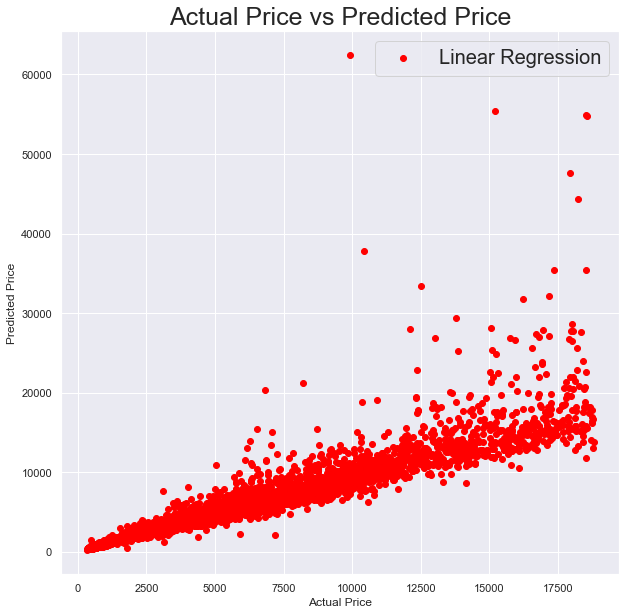

In [167]:
fig, ax = plt.subplots(1,1, sharey=False,figsize= (10,10))

ax.scatter(X_test_cpy['price'], X_test_cpy['predicted_LR'], color='Red',label='Linear Regression')

ax.set(xlabel = "Actual Price",ylabel="Predicted Price")
ax.set_title("Actual Price vs Predicted Price",fontsize=25);

ax.legend(fontsize=20)
plt.show()

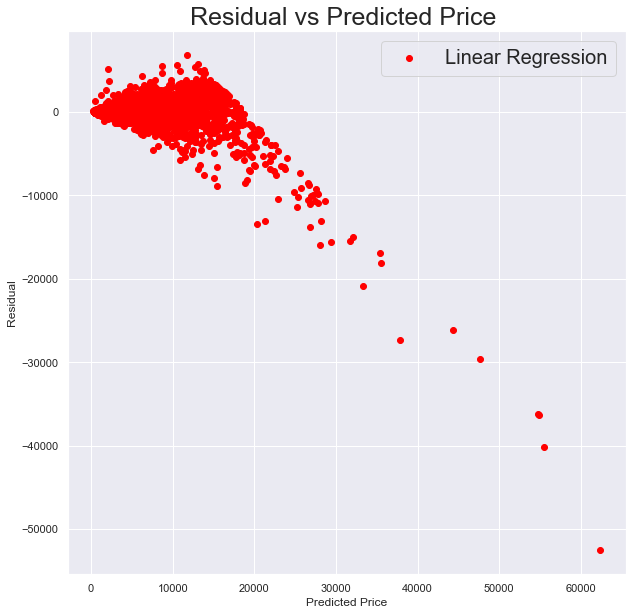

In [168]:
fig, ax = plt.subplots(1,1, sharey=False,figsize= (10,10))

ax.scatter( X_test_cpy['predicted_LR'], X_test_cpy['price']-X_test_cpy['predicted_LR'],color='Red',label='Linear Regression')
ax.set(xlabel = "Predicted Price",ylabel="Residual")
ax.set_title("Residual vs Predicted Price ",fontsize=25);

ax.legend(fontsize=20)
plt.show()

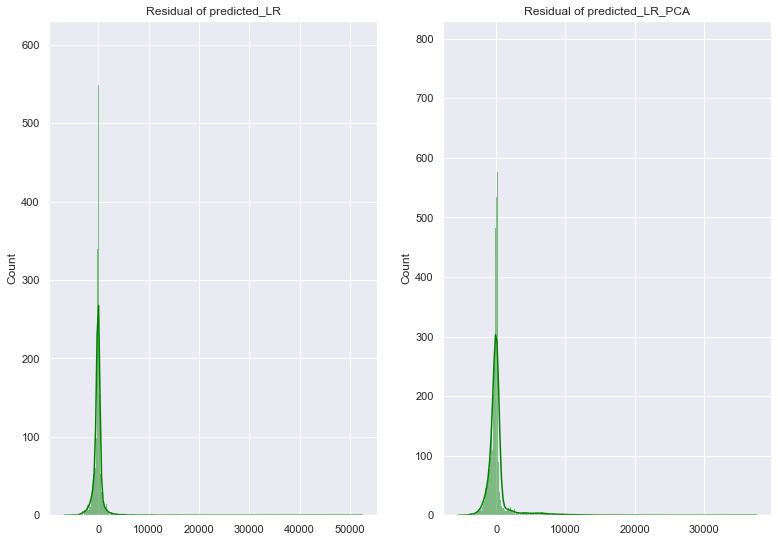

In [159]:
#Plots to see the distribution of the continuous features individually
plt.figure(figsize= (20,20))
distplot_no=1
sns.set(font_scale=1)
no_of_graphs_rows=3
rows=2

for col in X_test_cpy.columns[10:] :
        distplot_title = "Residual of " + col
        plt.subplot(rows,no_of_graphs_rows,distplot_no)
        sns.histplot(X_test_cpy[col]-X_test_cpy["price"] ,color='green',kde=True).set(title =distplot_title)
        distplot_no = distplot_no + 1 

### K-Mean clustering for differtiating high and low price cubic zirconia

In [160]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
ss=StandardScaler() 
scaled_df1 = ss.fit_transform(cubic_df1.drop(['log_price'], axis=1))

In [161]:
wss =[]
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df1)
    wss.append(KM.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

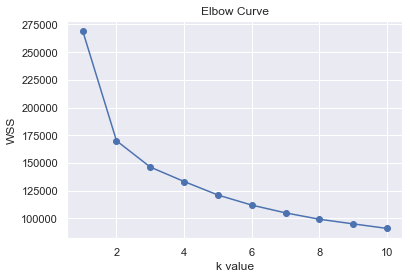

In [162]:
sns.set(font_scale=1)
plt.plot(range(1,11), wss, 'o-');
plt.title('Elbow Curve')
plt.xlabel('k value')
plt.ylabel('WSS')
plt.show


In [163]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_df1)
labels = k_means.labels_
df1_cpy["Clus_kmeans"] = labels
df1_cpy.head()

carat        cut color clarity  depth  table     x     y     z   price  \
1   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66   499.0   
2   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70   984.0   
3   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78  6289.0   
4   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96  1082.0   
5   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65   779.0   

   log_price  Clus_kmeans  
1   6.214608            1  
2   6.892642            1  
3   8.746716            0  
4   6.987490            1  
5   6.659294            1

In [164]:
df1_cpy.Clus_kmeans.value_counts().sort_index()

0    11252
1    15681
Name: Clus_kmeans, dtype: int64

In [165]:
clust_profile=df1_cpy.drop(['log_price'],axis=1)
clust_profile=clust_profile.groupby('Clus_kmeans').mean()
clust_profile['freq']=df1_cpy.Clus_kmeans.value_counts().sort_index()
clust_profile

carat      depth      table         x         y         z  \
Clus_kmeans                                                                 
0            1.250525  61.812638  57.975738  6.861395  6.853512  4.237083   
1            0.465421  61.697478  57.047924  4.917475  4.926453  3.035716   

                   price   freq  
Clus_kmeans                      
0            7494.365002  11252  
1            1385.294050  15681

<AxesSubplot:xlabel='z', ylabel='price'>

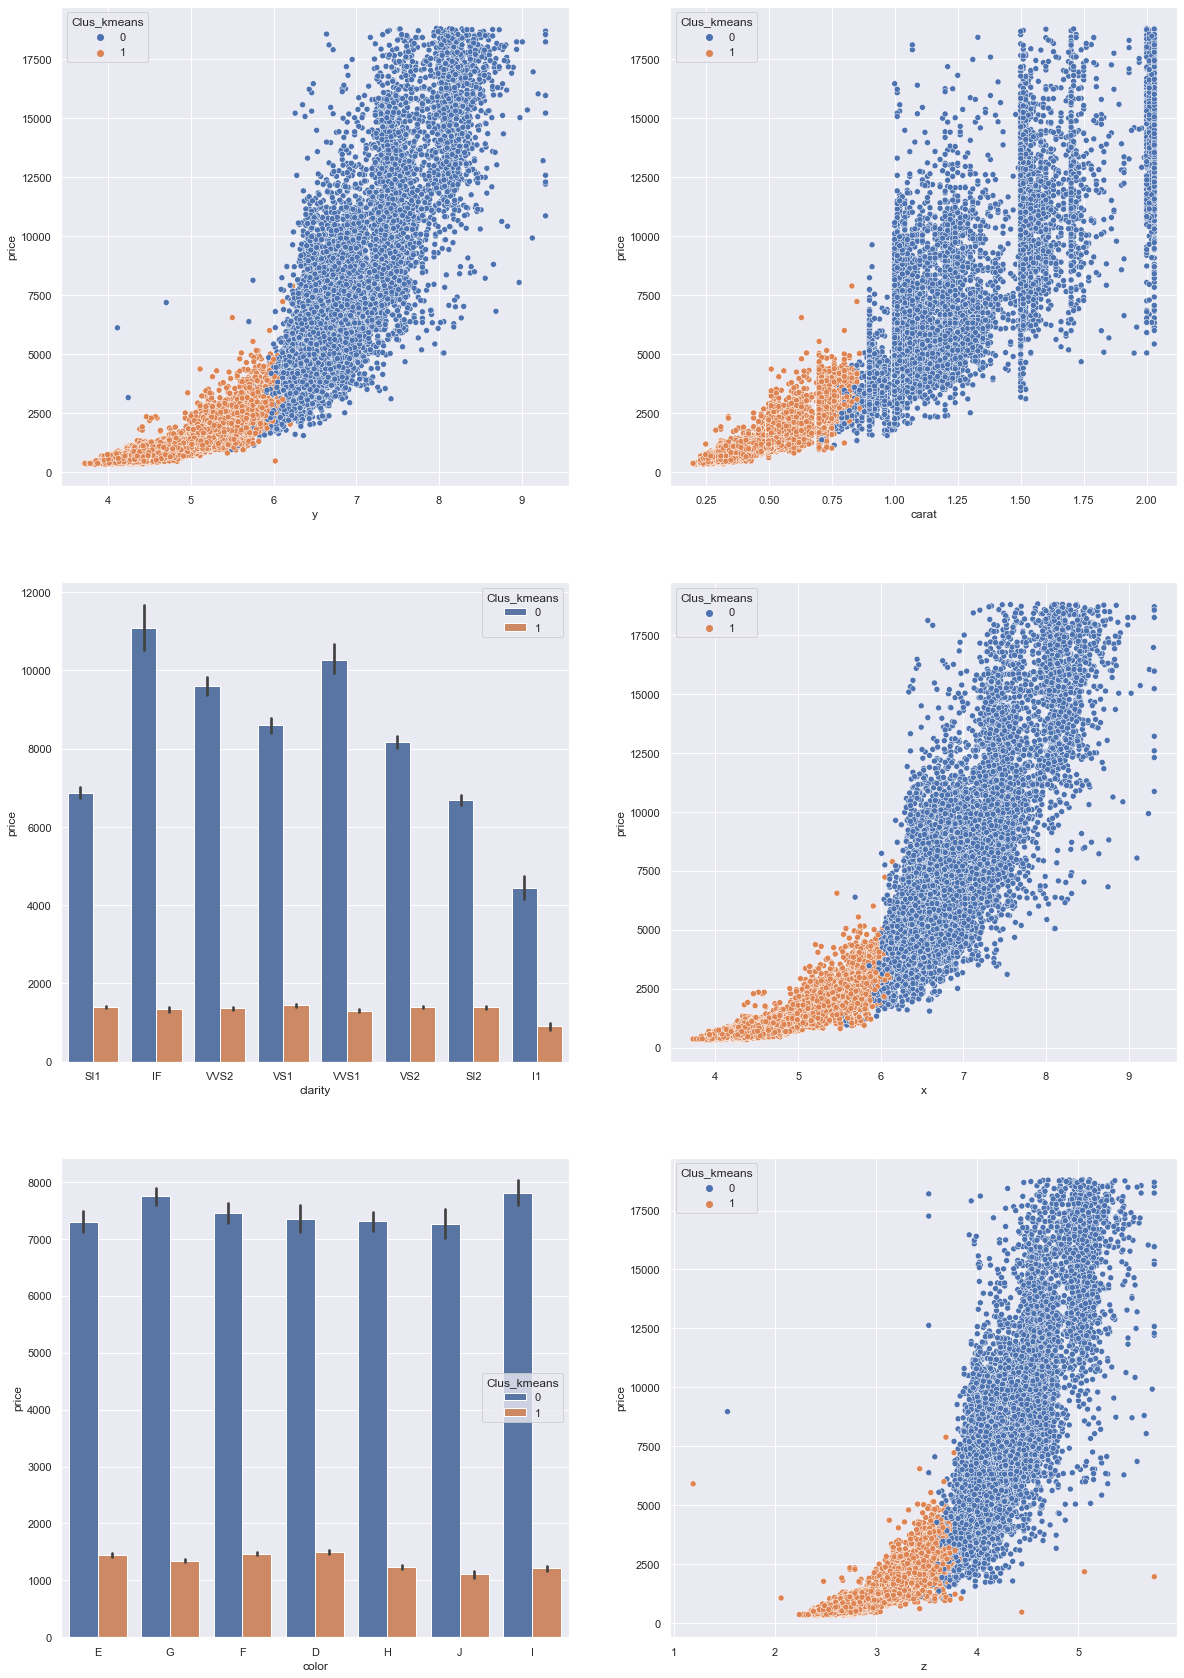

In [166]:
plt.figure(figsize=(20,30))
plt.subplot(3,2,1)
sns.set(font_scale=1)

sns.scatterplot(x=df1_cpy['y'],y=df1_cpy['price'],hue=df1_cpy['Clus_kmeans'])
plt.subplot(3,2,2)

sns.scatterplot(x=df1_cpy['carat'],y=df1_cpy['price'],hue=df1_cpy['Clus_kmeans'])
plt.subplot(3,2,3)

sns.barplot(x=df1_cpy['clarity'],y=df1_cpy['price'],hue=df1_cpy['Clus_kmeans'])
plt.subplot(3,2,4)

sns.scatterplot(x=df1_cpy['x'],y=df1_cpy['price'],hue=df1_cpy['Clus_kmeans'])
plt.subplot(3,2,5)

sns.barplot(x=df1_cpy['color'],y=df1_cpy['price'],hue=df1_cpy['Clus_kmeans'])
plt.subplot(3,2,6)

sns.scatterplot(x=df1_cpy['z'],y=df1_cpy['price'],hue=df1_cpy['Clus_kmeans'])


### Inference :
    
    The final Linear Regression equation is

log price = b0 + b1 * carat + b2 * cut + b3 * color + b4 * clarity + b5 * depth + b6 * table + b7 * x + b8 * y + b9 * z

log price = (-3.99) + (-0.98) * carat + (0.02) * cut + (0.08) * color + (0.12) * clarity + (0.05) * depth + (0.01) * table + (0.75) * x + (0.47) * y + (0.19) * z

When carat increases by 1 unit, log_price decreases by 0.98 units, keeping all other predictors constant. This is absurd as we have seen in the analysis that price increases with the carat.

Coefficient of x,y, and z is positive which means log price increases with the increase in x,y,z value. These are correlated with each other and carat. Due to high multicollinearity in the data set , as the value of carat will increase, value of x,y and z will increase. Overall effect results in increasing the price. Due to high multicollinearity these coefficients are not stable and there could be multiple coefffcient values which will give the same predicted value but the coefficients value would be different. Hence we should not rely on these coefficients.

We could perform PCA to reduce multicollinearity in the dataset but it would be difficult to comprehend the coefficients of the new components created out of PCA.

log_price = (7.78) + (0.45) * PC1 + (-0.12) * PC2 + (-0.08) * PC3 + (-0.06) * PC4 + (0.36) * PC5 + (-0.03) * PC6 We can see that PC1 has the most important coefficient (0.45) for PC1, where PC equation is defined as PC1 : 0.43 * carat + 0.43 x + 0.43 *y + 0.43z - 0.09 * cut - 0.14 *color - 0.19 *clarity + 0.01 * depth + 0.11 * table

We can see that PC1 is primarily the factor of carat , length, width and height of the zirocnia. So as these will increase , price of zirconia will significantly increase.

If we check the root mean square error of the predicted price, its coming as very high for linear regression model (1600).

As the width increases from 4mm to 9mm, price of cubic zirconia increases from 400 to 19000 approx. which is very steep rise

### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations. Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

### Recommendations

We have a database which have strong correlation between independent variables and hence we need to tackle with the issue of multicollinearity which can hinder the results of the model performance. Multicollinearity makes it difficult to understand how one variable influence the target variable. However, it does not affect the accuracy of the model. As a result while creating the model, I had dropped a lot of independent variables displaying multicollinearity or the ones with no direct relation with the target variable.

While we looked at the data during univariate analysis, we were able to establish that Carat is strongly related with the price variable, and also with a lot of other independent variables - x, y, and z, and low correlation with variables such as table and cut as well. It can be established that Carat will be a strong predictor in our model creation.The same trend was displayed even after the object columns were encoded. The carat variable continues to display strong to low correlation with most of the variables, making its claim to be the most important predictor firm

After the Linear Regression model was created, we can see the assumption coming true as the carat variable emerged as the single biggest factor impacting the target variable , followed with a few others within clarity variables. Carat variable has the highest coefficient value as compared to the other studies variables for this test case.

Even after scaling, our claim about carat being an important driver is reaffirmed.

As an alternate approach, we can choose to use the “cut” variable as one hot encoding or dummy encoding and run the model again to check on the overall model score or tackle the issue of multicollinearity. This can allow us to read the impact of cut variables on the target variable – Price, if company intends to study that as well.

However, for this case study and for the reasons mentioned above, I have not used one-hot encoding on the cut variable. For the business based on the model that we have created for the test case, some of the key variables that are likely to positively drive price change are (top 5 in descending order):

Carat

Clarity_IF

Clarity VVS_1

Clarity VVS_2

Clarity_vs1


As per the analysis, our recommendation to business is :-

1) We have predicted the price of cubiz zirconia using multiple regressor models.
R2 score of the the model as 99% and Root Mean square error for the test data set is around 568.

2) Top 5 features which are contributing to the high price of cubic zirconia are :-
    y (width)
    carat (weight)
    clarity
    x (length)
    color

3) Width, length, height and carat weight have a very strong correlation with each other. These are physical dimensions of the cubic zirconia, if we are increasing the one property, then the other has to be increased proportionately. Due to this relationship, it might be difficult to provide the linear equation with stable coefficients for the price prediction. Still we have obtained the linear equation as shown below :-

log price = (-3.99) + (-0.98) * carat + (0.02) * cut + (0.08) * color + (0.12) * clarity + (0.05) * depth + (0.01) * table + (0.75) * x + (0.47) * y + (0.19) * z



4) We have found that  Cut, Depth and Table attributes importance in predicting the price of cubic zirconia is the least as per the given data. So Business can check and analyse these features using some more dataset to understand the impact.

5) Cubic zirconia manufacturer should manufacture zirconia with the following specifications for higher price range and higher profits :-

Length > 6 mm
Width > 6 mm
Height > 4 mm
Carat weight> 0.8
Clarity better than l1

6) Cubic zirconia manufacturer should check the quantities sold for the following specifications :-
Length < 6 mm
Width < 6 mm
Height < 4 mm
Carat weight < 0.8
Clarity l1 or lower

For these specifications, price is low and if selling quantites are not high then these zirconia manufactuing should be discontinued.

### Problem 2: Logistic Regression and LDA

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.
Dataset for Problem 2: Holiday_Package.csv


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt   
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection

from sklearn.preprocessing import scale
from warnings import filterwarnings

filterwarnings('ignore')


#### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

### Read the data into the notebook

In [2]:
df2= pd.read_csv('Holiday_Package.csv',index_col=0)

In [3]:
# taking backup copy
df2_cpy = df2.copy()

In [4]:
df2.head()

Holliday_Package  Salary  age  educ  no_young_children  no_older_children  \
1               no   48412   30     8                  1                  1   
2              yes   37207   45     8                  0                  1   
3               no   58022   46     9                  0                  0   
4               no   66503   31    11                  2                  0   
5               no   66734   44    12                  0                  2   

  foreign  
1      no  
2      no  
3      no  
4      no  
5      no

In [5]:
df2.tail()

Holliday_Package  Salary  age  educ  no_young_children  no_older_children  \
868               no   40030   24     4                  2                  1   
869              yes   32137   48     8                  0                  0   
870               no   25178   24     6                  2                  0   
871              yes   55958   41    10                  0                  1   
872               no   74659   51    10                  0                  0   

    foreign  
868     yes  
869     yes  
870     yes  
871     yes  
872     yes

### Exploratory Data Analysis

### Checking the data types /information

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 54.5+ KB


### Inference :
    
    The data set contains 872 observations of data and 7 features. Since non null count is same in every column variable except depth, there appears no null data.

### Checking the shape (Number of rows and columns)

In [7]:
print('The dataset has {} rows and {} columns'.format(df2.shape[0], df2.shape[1]))

The dataset has 872 rows and 7 columns


In [8]:
df2.describe()

Salary         age        educ  no_young_children  \
count     872.000000  872.000000  872.000000         872.000000   
mean    47729.172018   39.955275    9.307339           0.311927   
std     23418.668531   10.551675    3.036259           0.612870   
min      1322.000000   20.000000    1.000000           0.000000   
25%     35324.000000   32.000000    8.000000           0.000000   
50%     41903.500000   39.000000    9.000000           0.000000   
75%     53469.500000   48.000000   12.000000           0.000000   
max    236961.000000   62.000000   21.000000           3.000000   

       no_older_children  
count         872.000000  
mean            0.982798  
std             1.086786  
min             0.000000  
25%             0.000000  
50%             1.000000  
75%             2.000000  
max             6.000000

In [9]:
df2.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

### Checking for duplicates

In [10]:
# Check for duplicate data

dups = df2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df2[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Holliday_Package, Salary, age, educ, no_young_children, no_older_children, foreign]
Index: []

### Inference :
    
    No duplicated data is present

### Unique Values for categorical features

In [11]:
for column in df2.columns:
    if df2[column].dtype == 'object':
        print(column.upper(),': ',df2[column].nunique())
        print(df2[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [12]:
df2.Holliday_Package.value_counts(1)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [13]:
df2.skew()

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

### Inference :
    
From summary, we can see that :-

max salary(236K) is very high as compared to mean(47K) and median(42K). Hence it contains outlier

Mean and median of age are approximately similar 39-40. It doesnt contains outlier.

Education middle 50% of data lies in between 8 to 12 range with few outliers.

Most employees have no of young children as 0.

Most of the employees have 1 child who is older than 7 years

All the columns are positively skewed except education

### Univariate and Bivariate Analysis

Text(0.5, 1.0, 'no_older_children Distribution')

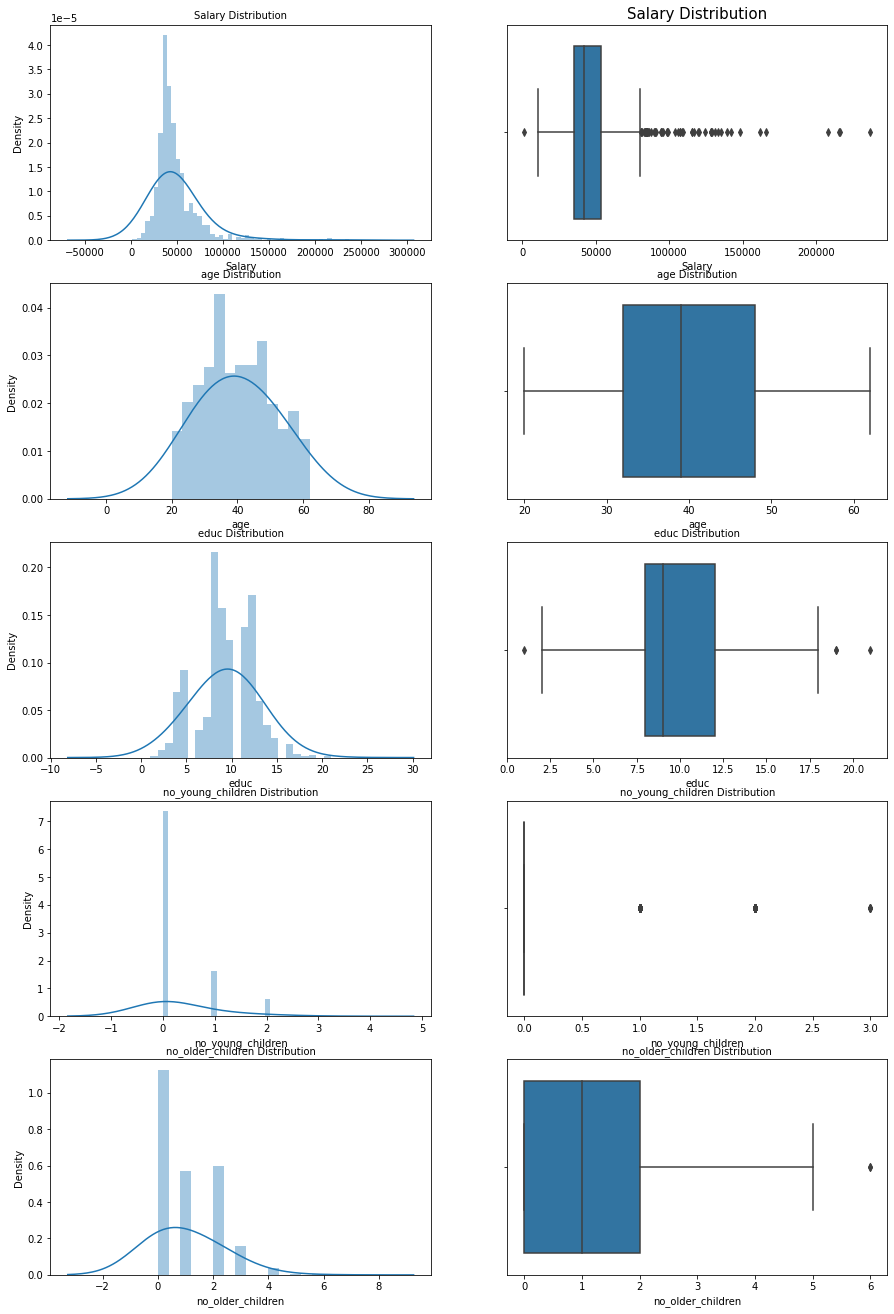

In [14]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15, 23)

a = sns.distplot(df2['Salary'], kde_kws = {'bw' : 1}, ax=axes[0][0])
a.set_title("Salary Distribution",fontsize=10)

a = sns.boxplot(df2['Salary'] , orient = "v" , ax=axes[0][1])
a.set_title("Salary Distribution",fontsize=15)

a = sns.distplot(df2['age'], kde_kws = {'bw' : 1}, ax=axes[1][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df2['age'] , orient = "v" , ax=axes[1][1])
a.set_title("age Distribution",fontsize=10)

a = sns.distplot(df2['educ'],  kde_kws = {'bw' : 1}, ax=axes[2][0])
a.set_title("educ Distribution",fontsize=10)

a = sns.boxplot(df2['educ'] , orient = "v" , ax=axes[2][1])
a.set_title("educ Distribution",fontsize=10)

a = sns.distplot(df2['no_young_children'],  kde_kws = {'bw' : 1}, ax=axes[3][0])
a.set_title("no_young_children Distribution",fontsize=10)

a = sns.boxplot(df2['no_young_children'] , orient = "v" , ax=axes[3][1])
a.set_title("no_young_children Distribution",fontsize=10)

a = sns.distplot(df2['no_older_children'], kde_kws = {'bw' : 1}, ax=axes[4][0])
a.set_title("no_older_children Distribution",fontsize=10)

a = sns.boxplot(df2['no_older_children'] , orient = "v" , ax=axes[4][1])
a.set_title("no_older_children Distribution",fontsize=10)

### Categorical Variables

<AxesSubplot:xlabel='foreign', ylabel='count'>

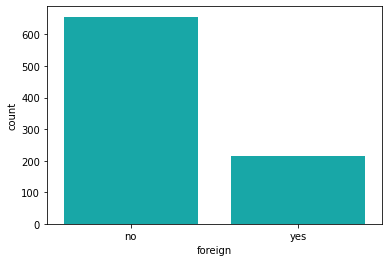

In [15]:
sns.countplot(x="foreign", data=df2, color="c")

<AxesSubplot:xlabel='Holliday_Package', ylabel='count'>

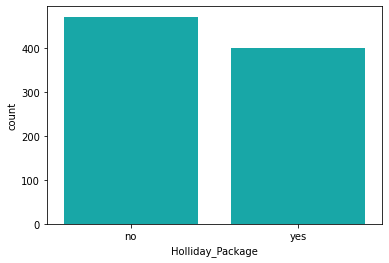

In [16]:
sns.countplot(x="Holliday_Package", data=df2, color="c")

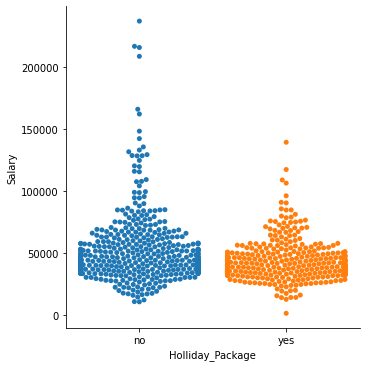

In [17]:
sns.catplot(x="Holliday_Package", y="Salary",kind="swarm",data=df2)

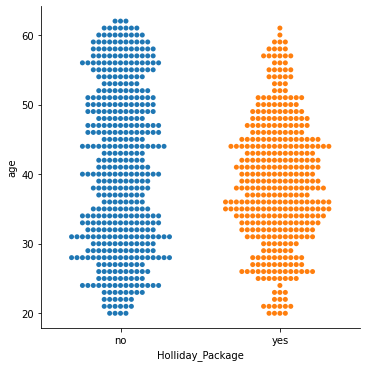

In [18]:
sns.catplot(x="Holliday_Package", y="age",kind="swarm",data=df2)

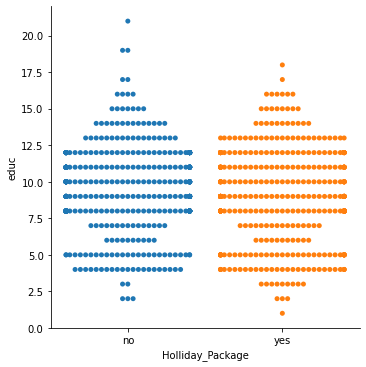

In [19]:
sns.catplot(x="Holliday_Package", y="educ",kind="swarm",data=df2)

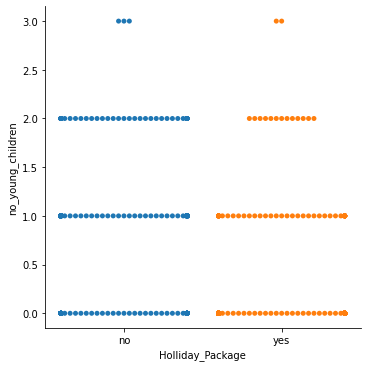

In [20]:
sns.catplot(x="Holliday_Package", y="no_young_children",kind="swarm",data=df2)

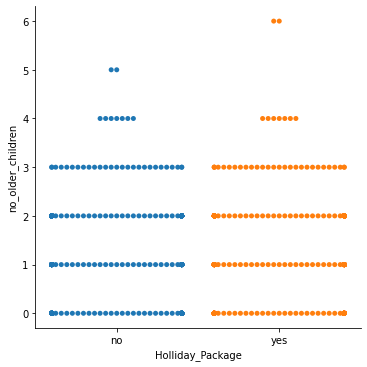

In [21]:
sns.catplot(x="Holliday_Package", y="no_older_children",kind="swarm",data=df2)

<AxesSubplot:xlabel='age', ylabel='Salary'>

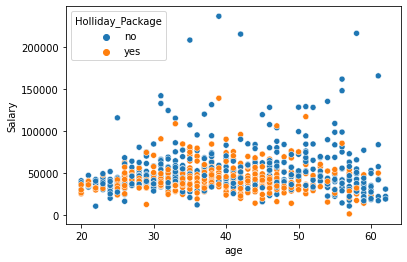

In [22]:
sns.scatterplot(data = df2, x='age',y='Salary', hue = 'Holliday_Package')

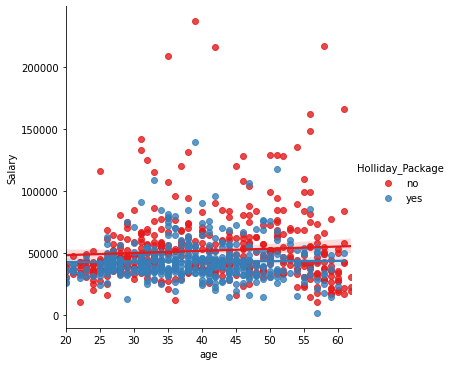

In [23]:
sns.lmplot(x="age", y="Salary", hue="Holliday_Package", data=df2,palette="Set1")

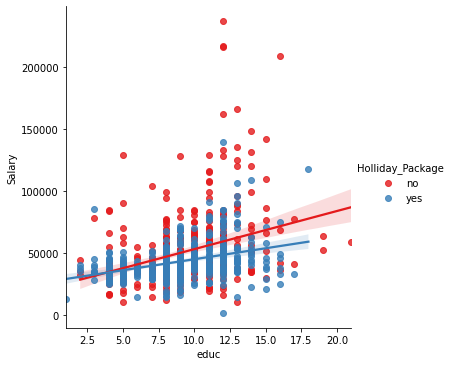

In [24]:
sns.lmplot(x="educ", y="Salary", hue="Holliday_Package", data=df2,palette="Set1")

<AxesSubplot:xlabel='educ', ylabel='Salary'>

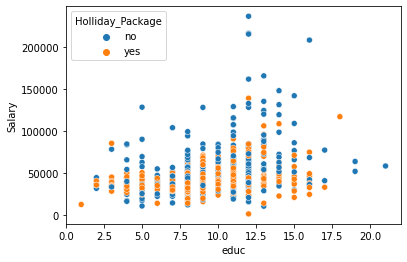

In [25]:
sns.scatterplot(data = df2, x='educ',y='Salary', hue = 'Holliday_Package')

<AxesSubplot:xlabel='no_young_children', ylabel='age'>

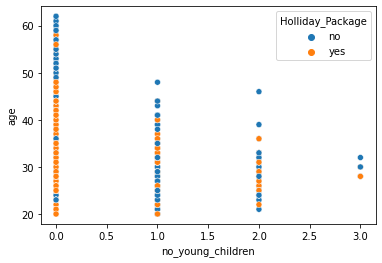

In [26]:
sns.scatterplot(data = df2, x='no_young_children',y='age', hue = 'Holliday_Package')

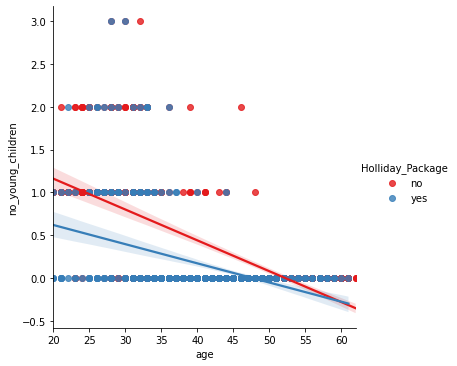

In [27]:
sns.lmplot(x="age", y="no_young_children", hue="Holliday_Package", data=df2,palette="Set1")

<AxesSubplot:xlabel='no_older_children', ylabel='age'>

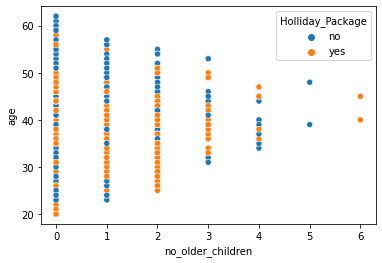

In [28]:
sns.scatterplot(data = df2, x='no_older_children',y='age', hue = 'Holliday_Package')

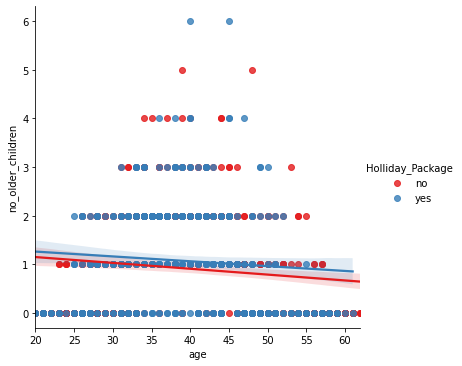

In [29]:
sns.lmplot(x="age", y="no_older_children", hue="Holliday_Package", data=df2,palette="Set1")

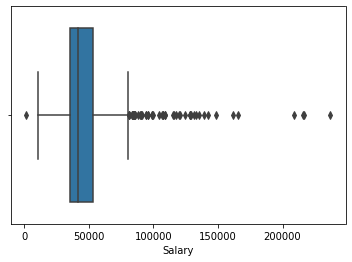

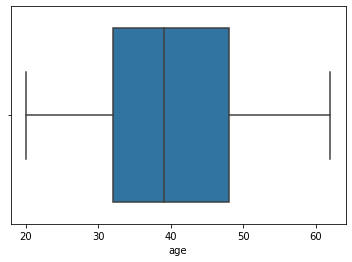

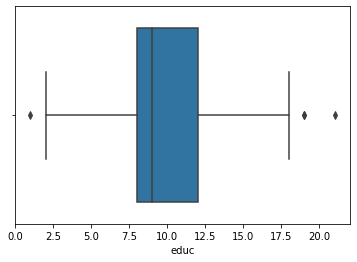

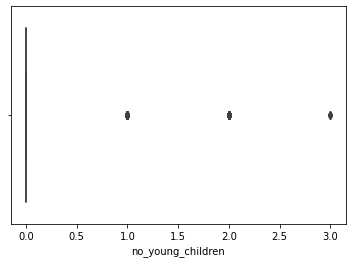

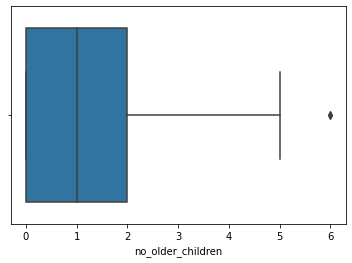

In [30]:
cols = ['Salary' ,'age', 'educ', 'no_young_children', 'no_older_children']

for i in cols:
    sns.boxplot(df2[i])
    plt.show()

In [31]:
df2.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

<AxesSubplot:>

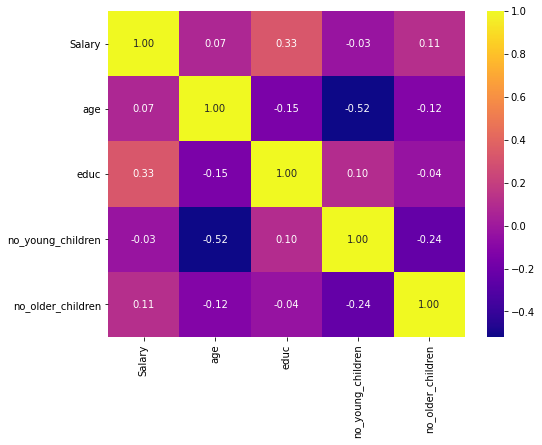

In [32]:
### Checking for correlations

df_cor = df2.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, fmt = '.2f', cmap='plasma')

### Checking for missing values

In [33]:
# Check for missing value in any colum
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    percent = percent.round(2)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df2)

Total  Percent
foreign                0      0.0
no_older_children      0      0.0
no_young_children      0      0.0
educ                   0      0.0
age                    0      0.0
Salary                 0      0.0
Holliday_Package       0      0.0

### Inference :
    
    There are no NULL values in the data

### Check for Outliers (Which all variables have an outlier?)

In [34]:
## Using User definition to return IQR, LR, UR for a column
def return_IQR_LR_UR(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=round((Q3-Q1),2)
    lower_range= round(Q1-(1.5 * IQR),2)
    upper_range= round(Q3+(1.5 * IQR),2)
    return IQR, lower_range, upper_range

In [35]:
# creating a function to return CV, skew, IQR, Upper range, lower range of dataframe
def CV_row(df):   
    i=0;
    CV=[]
    Skew=[]
    IQR=[]
    UR=[]
    LR=[]
    numeric_col_names=df.select_dtypes(exclude='object').columns
    for i in df.columns:
        if (i in numeric_col_names):
            CV.append(round(variation(df[i]),2))
            Skew.append(round(df[i].skew(),2))
            IQR_val, lower_range, upper_range = return_IQR_LR_UR(df[i])
            IQR.append(round(IQR_val,2))
            UR.append(round(upper_range,2))
            LR.append(round(lower_range,2))

    return CV, Skew, IQR,  UR, LR    


In [36]:
def calc_rows(Col_list,no_of_graph_row=4):  
    if (len(Col_list) % no_of_graph_row == 0):
        rows= len(Col_list) / no_of_graph_row
    else:
        rows= len(Col_list) / no_of_graph_row + 1
    return rows

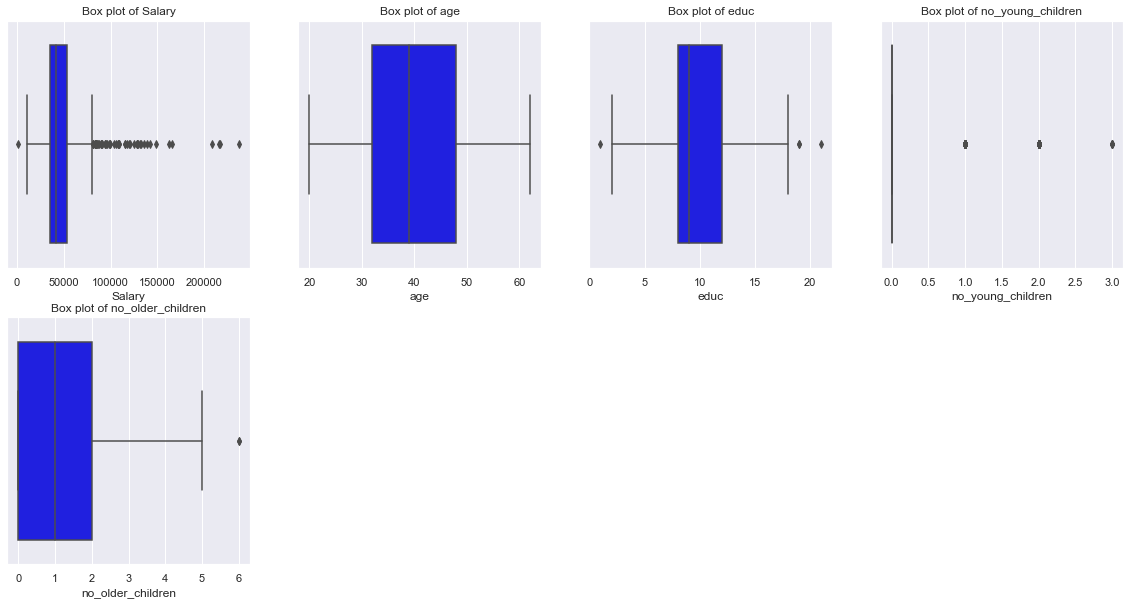

In [37]:
# Checking for Outliers
numeric_col_names=df2.select_dtypes(exclude='object').columns
no_of_graphs_rows=4
rows=calc_rows(numeric_col_names, no_of_graphs_rows)
sns.set(font_scale=1)
plt.figure(figsize= (20,10))
box_plot_no=1
for col in df2.columns :
    if (col in numeric_col_names):
        box_plot_title = "Box plot of " + col
        plt.subplot(rows,no_of_graphs_rows,box_plot_no)
        sns.boxplot(x= col,data =df2 ,color='blue').set(title =box_plot_title)
        box_plot_no = box_plot_no + 1

### Inference :
    
    As evident from above box plot, there are many outliers in salary column.

education, no of young childern and old children columns have very few outliers which we can ignore

### Plot the Histograms

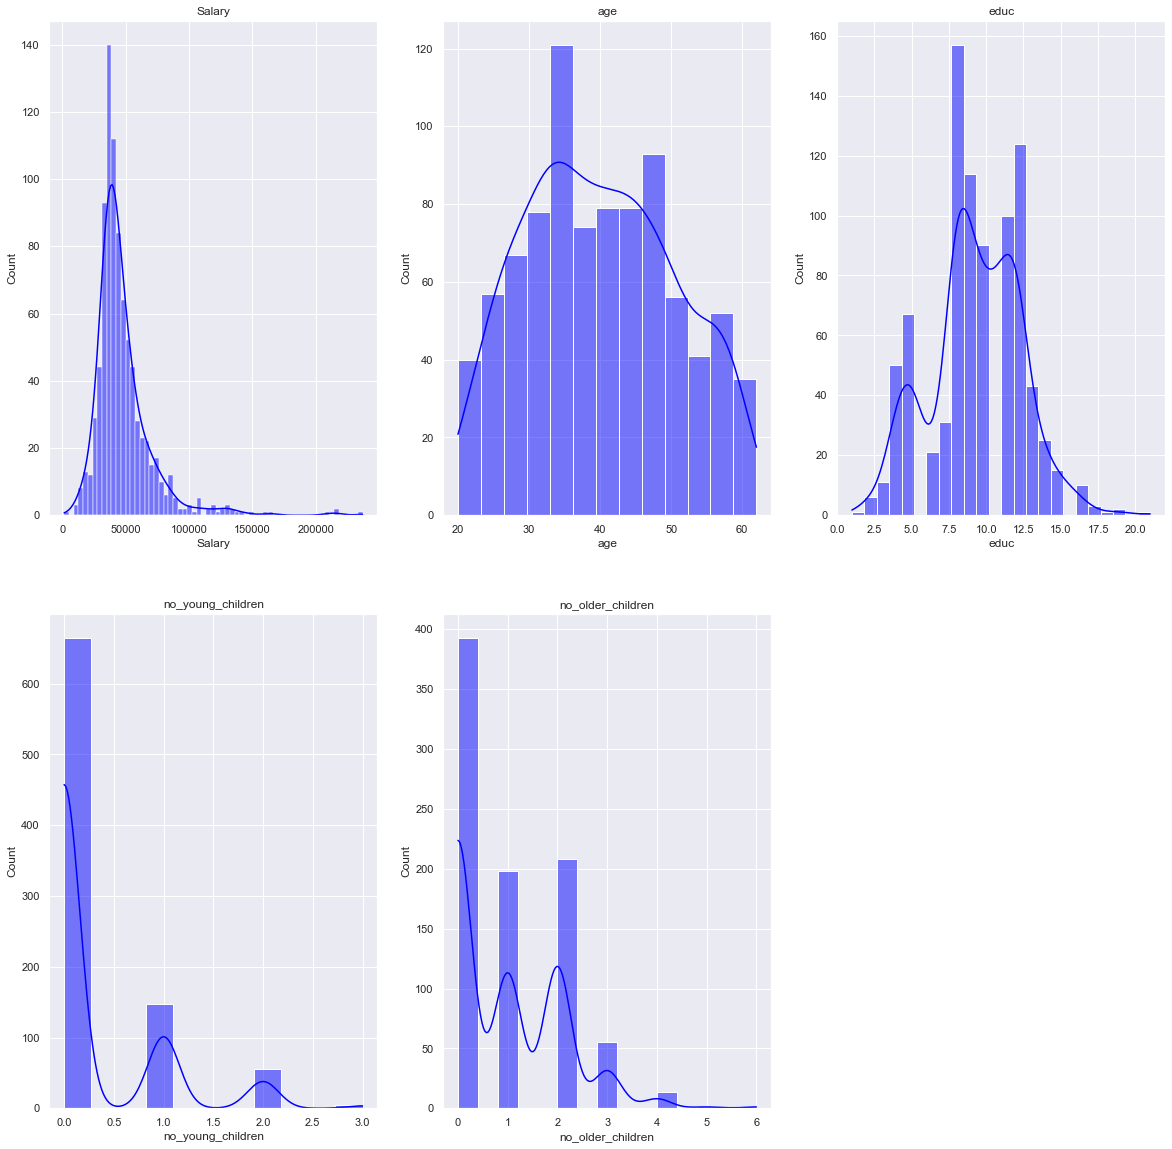

In [38]:
#Plots to see the distribution of the continuous features individually
plt.figure(figsize= (20,20))
distplot_no=1
sns.set(font_scale=1)
no_of_graphs_rows=3
rows=calc_rows(numeric_col_names, no_of_graphs_rows)

for col in df2.columns :
    if (col in numeric_col_names):
        distplot_title = col
        plt.subplot(rows,no_of_graphs_rows,distplot_no)
        sns.histplot(df2[col] ,color='blue',kde=True).set(title =distplot_title)
        distplot_no = distplot_no + 1 

### Inference :
    
    From histograms we can see that
        Salary range is 0-100000 for most of the employees. However few employees are getting more salary causing skewness

        Age appears to be normally distributed

        Around 650 employees out of 872 have their young children as 0.

        Around 380 out of 872 employees have no of older children as 0

        Education middle 50% of data lies in between 8 to 12 range with few outliers.

### Correcting Spelling error in Column names

In [39]:
df2.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [40]:
df2.rename(columns={'Holliday_Package':'Holiday_Package'},inplace=True)

In [41]:
df2.rename(columns={'Holiday_Package':'HolidayPackage','age':'Age','educ':'Educ','no_young_children':'No_young_children','no_older_children':'No_older_children','foreign':'Foreign'},inplace=True)

In [42]:
df2.columns

Index(['HolidayPackage', 'Salary', 'Age', 'Educ', 'No_young_children',
       'No_older_children', 'Foreign'],
      dtype='object')

### Bi-variate, and multivariate analysis

### Swarm Plots

<AxesSubplot:xlabel='HolidayPackage', ylabel='Age'>

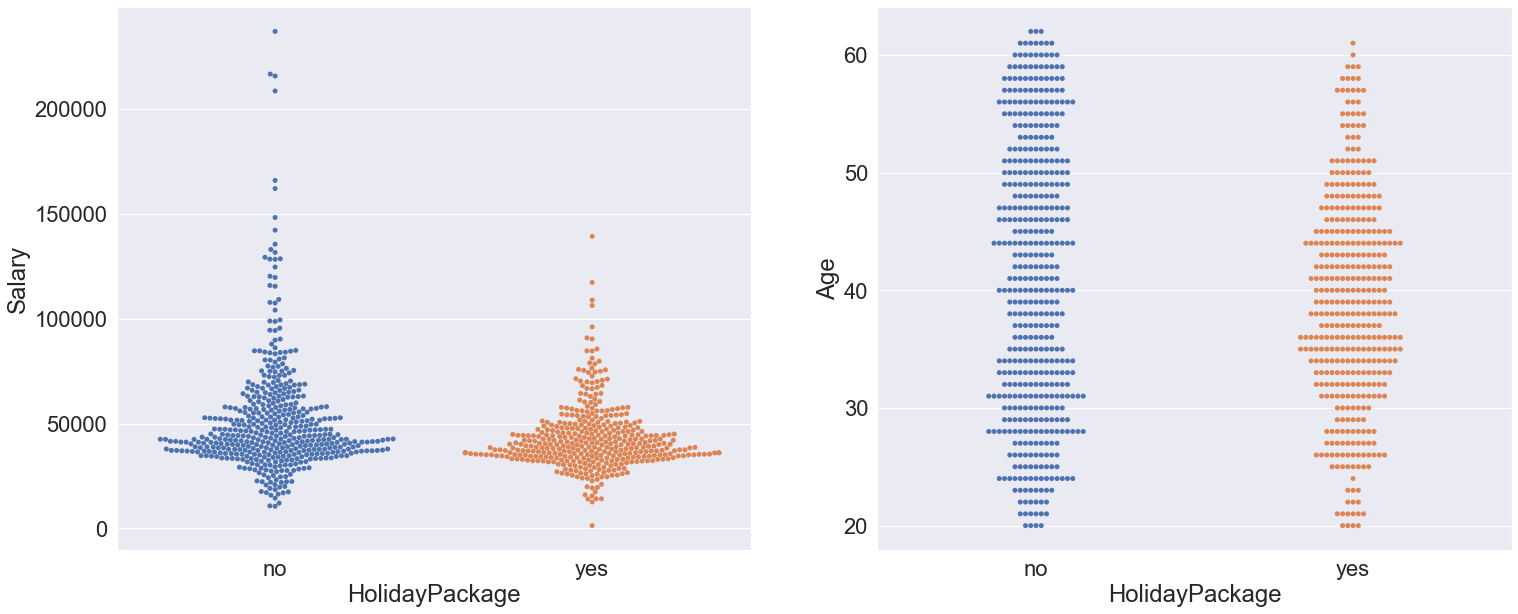

In [43]:
plt.figure(figsize=(25,10))
sns.set(font_scale=2)
plt.subplot(1,2,1)
sns.swarmplot(data=df2,x='HolidayPackage', y='Salary')
plt.subplot(1,2,2)
sns.swarmplot(data=df2,x='HolidayPackage', y='Age')

### Inference :
    
    We can see that as:- As Salary increases to the max value, employees count increases for the not opting for the holiday package. As Age increases beyond 50 level, less emplyees opt for the holiday package

<AxesSubplot:xlabel='Foreign', ylabel='count'>

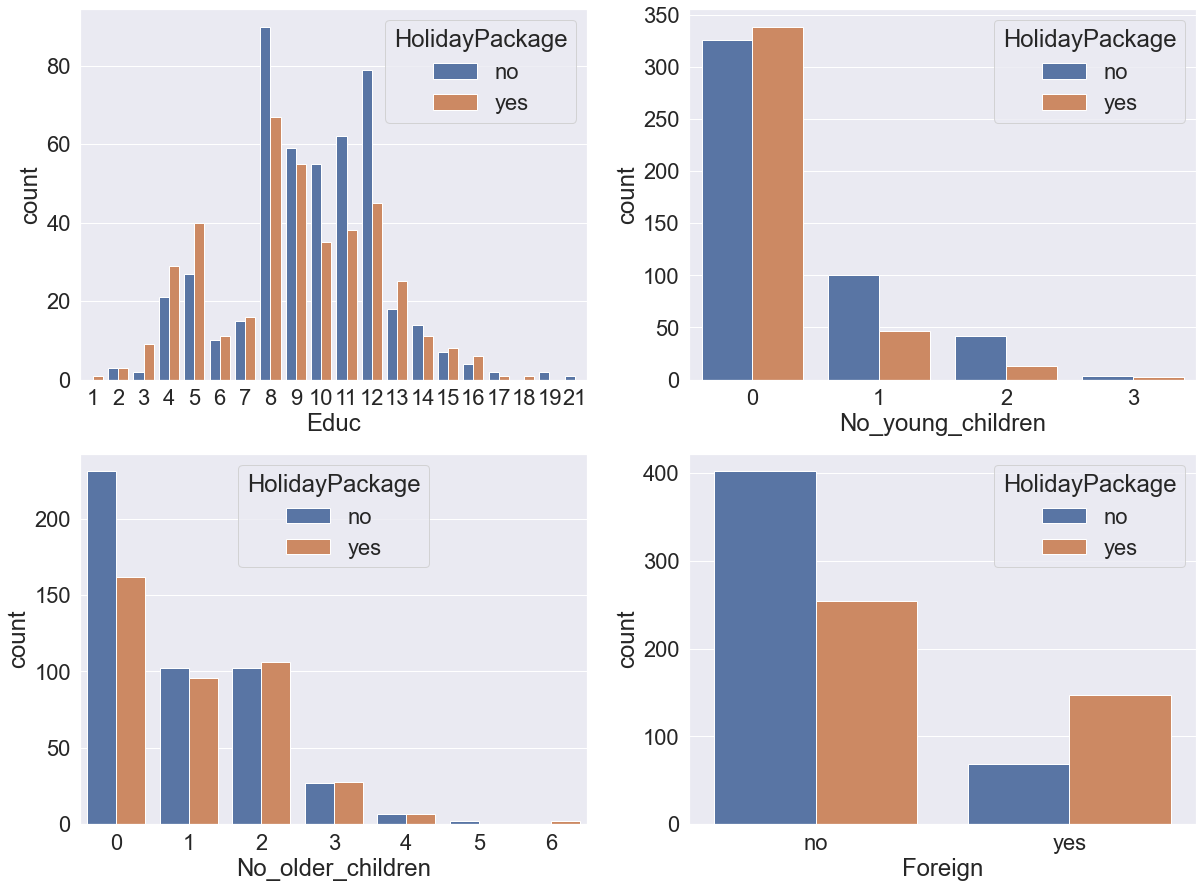

In [44]:
### Count plot
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(data=df2,hue='HolidayPackage', x='Educ')

plt.subplot(2,2,2)
sns.countplot(data=df2,hue='HolidayPackage', x='No_young_children')

plt.subplot(2,2,3)
sns.countplot(data=df2,hue='HolidayPackage', x='No_older_children')

plt.subplot(2,2,4)
sns.countplot(data=df2,hue='HolidayPackage', x='Foreign')

### Inference :

More Employess opt for Tours if their education level is 3,4,5,6,7,13,14,15,16

Employees dont opt for tours if they have young child

Older children count doesnt appearst to have much impact on tour opted by employees or not

Foreigner employees tends to opt more for the tour

In [45]:
pd.crosstab(df2['No_young_children'],df2['HolidayPackage'],margins=True)

HolidayPackage      no  yes  All
No_young_children               
0                  326  339  665
1                  100   47  147
2                   42   13   55
3                    3    2    5
All                471  401  872

### Inference :
    
   We can see that around 24% of employees have one or more young child. Out of these employees, 70% ((100+42+3)/(147+55+5)) are not opting for tours.

In [46]:
(100+42+3)/(147+55+5)

0.7004830917874396

In [47]:
pd.crosstab(df2['Foreign'],df2['HolidayPackage'],margins=True)

HolidayPackage   no  yes  All
Foreign                      
no              402  254  656
yes              69  147  216
All             471  401  872

### Inference :
    
    As per the data, we can say that 68% of foreign employees are opting for the tour packages.

### Correlation matrix

In [48]:
Cor=df2.corr().round(2)
Cor

Salary   Age  Educ  No_young_children  No_older_children
Salary               1.00  0.07  0.33              -0.03               0.11
Age                  0.07  1.00 -0.15              -0.52              -0.12
Educ                 0.33 -0.15  1.00               0.10              -0.04
No_young_children   -0.03 -0.52  0.10               1.00              -0.24
No_older_children    0.11 -0.12 -0.04              -0.24               1.00

### Heat Map

<AxesSubplot:>

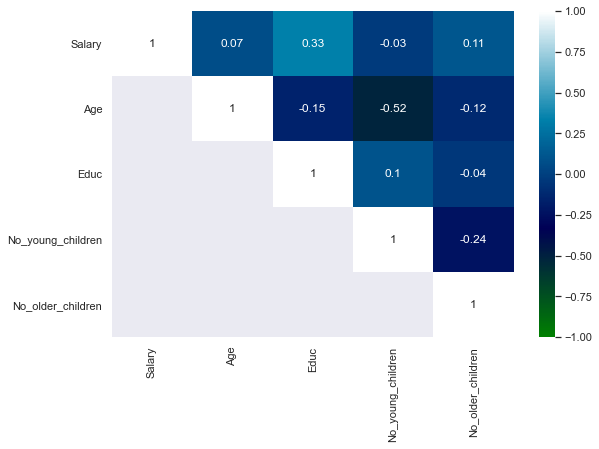

In [49]:
## Correlation Matrix
sns.set(font_scale=1)
plt.figure(figsize=(9 ,6))
mask = np.array(Cor)
mask[np.triu_indices_from(mask)] =False
sns.heatmap(data =Cor, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='ocean')

### Inference :
    
We can see in heatmap & correlation matrix that:

    Salary has correlation with educ.

    Age is negatively correlated with No_young_children

### Pairplot

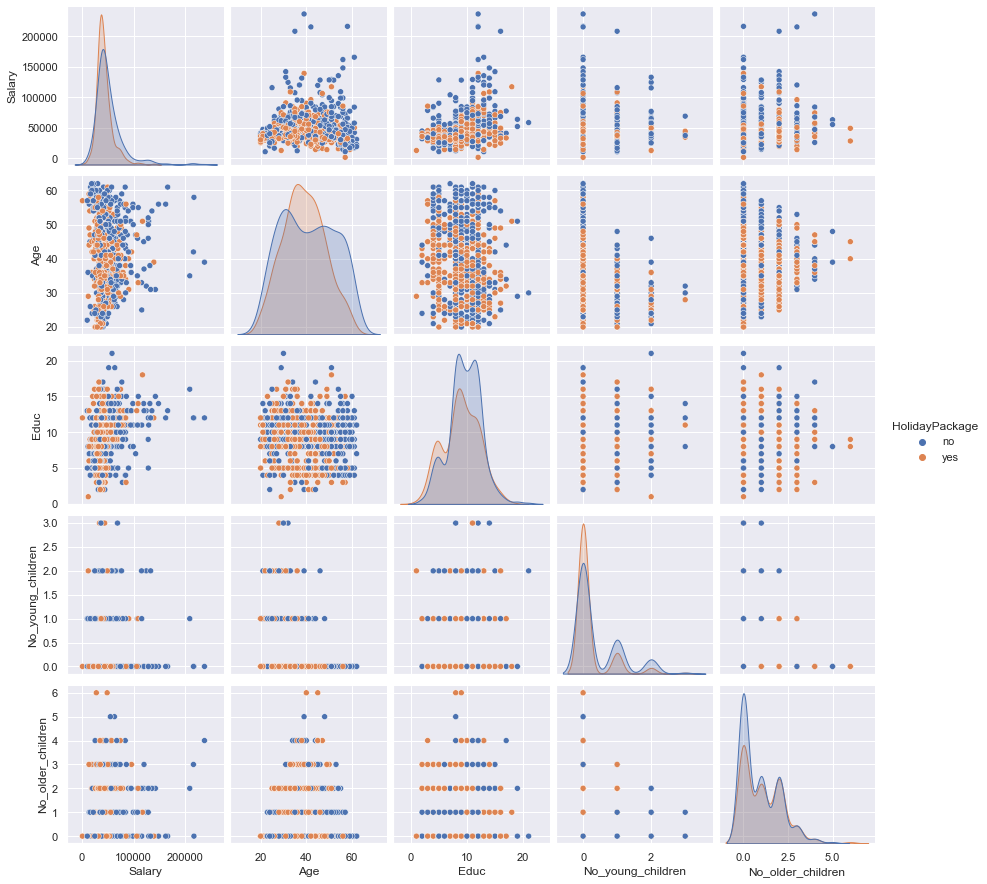

In [50]:
sns.pairplot(df2,hue='HolidayPackage',diag_kind='kde')

### Inference :
    
    As depicted in heat map of correlation matrix, we can see that no of young children negatively correlated with age.

Salary is slightly correlated with Educ

### VIF Checking for Multicollinearity

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
def checkvif(X):
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print (vif)

In [53]:
df2.columns

Index(['HolidayPackage', 'Salary', 'Age', 'Educ', 'No_young_children',
       'No_older_children', 'Foreign'],
      dtype='object')

In [54]:
X = df2[['Salary','Age','Educ','No_young_children','No_older_children']]
checkvif(X)

           Variables       VIF
0             Salary  6.027872
1                Age  6.832751
2               Educ  8.890845
3  No_young_children  1.403995
4  No_older_children  1.817912


### Inference :
    We can see that VIF is greator than 5 for salary, age and education. However its value is less than 10. So dataset has 
    some multicollinearity

### Outlier treatment (flooring and capping)

   
    Doing outlier treatment for Salary attribute as other columns have very less outliers and that are near lower and upper ranges

In [55]:
def Outlier_treatment(df,numeric_col_names):   
    i=0;
    for i in df.columns:
        if (i in numeric_col_names):
            IQR, lr, ur = return_IQR_LR_UR(df[i])
            print ('col:', i , ',lower range :', lr, ',upper range:', ur, ',No of outliers:', df[(df[i]<lr)|(df[i]>ur)][i].count(), ',outlier %:', round(df[(df[i]<lr)|(df[i]>ur)][i].count()*100/df[i].count(),2))
            df[i] =np.where(df[i]>ur,ur,df[i])
            df[i] =np.where(df[i]<lr,lr,df[i])

    return df 

In [56]:
df2=Outlier_treatment(df2,numeric_col_names[0])

col: Salary ,lower range : 8105.75 ,upper range: 80687.75 ,No of outliers: 57 ,outlier %: 6.54


<AxesSubplot:xlabel='Salary'>

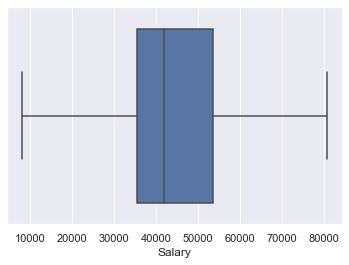

In [57]:
sns.boxplot(df2['Salary'])

#### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

### Scaling

Scaling is not required for the logistic regression model. Hence its not performed here

In [58]:
df2_cpy=df2.copy()

In [59]:
df2.isnull().sum()

HolidayPackage       0
Salary               0
Age                  0
Educ                 0
No_young_children    0
No_older_children    0
Foreign              0
dtype: int64

In [60]:
cont=df2.dtypes[(df2.dtypes!='uint8') & (df2.dtypes!='object')].index

In [61]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [62]:
for column in df2[cont].columns:
    lr,ur=remove_outlier(df2[column])
    df2[column]=np.where(df2[column]>ur,ur,df2[column])
    df2[column]=np.where(df2[column]<lr,lr,df2[column])

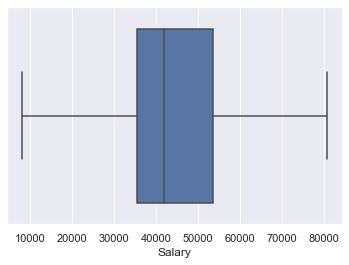

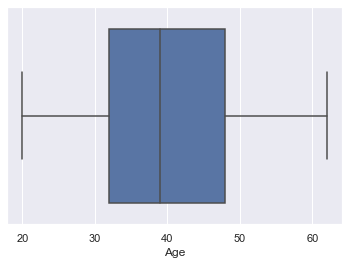

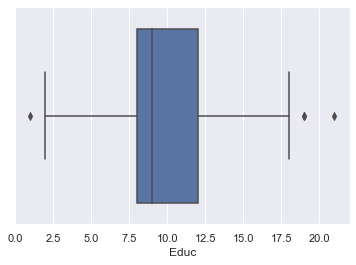

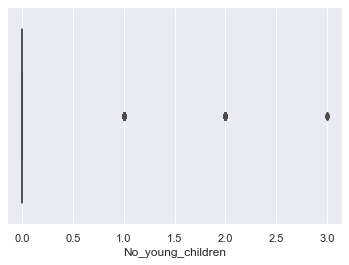

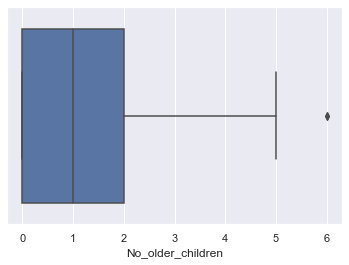

In [60]:
cols = ['Salary' ,'Age', 'Educ', 'No_young_children', 'No_older_children']

for i in cols:
    sns.boxplot(df2[i])
    plt.show()

In [61]:
df2.head()

HolidayPackage   Salary  Age  Educ  No_young_children  No_older_children  \
1             no  48412.0   30     8                  1                  1   
2            yes  37207.0   45     8                  0                  1   
3             no  58022.0   46     9                  0                  0   
4             no  66503.0   31    11                  2                  0   
5             no  66734.0   44    12                  0                  2   

  Foreign  
1      no  
2      no  
3      no  
4      no  
5      no

In [62]:
### Converting categorical to dummy variables in data

data = pd.get_dummies(df2, columns=['HolidayPackage','Foreign'], drop_first = True)

In [63]:
data.head()

Salary  Age  Educ  No_young_children  No_older_children  \
1  48412.0   30     8                  1                  1   
2  37207.0   45     8                  0                  1   
3  58022.0   46     9                  0                  0   
4  66503.0   31    11                  2                  0   
5  66734.0   44    12                  0                  2   

   HolidayPackage_yes  Foreign_yes  
1                   0            0  
2                   1            0  
3                   0            0  
4                   0            0  
5                   0            0

In [64]:
data.columns

Index(['Salary', 'Age', 'Educ', 'No_young_children', 'No_older_children',
       'HolidayPackage_yes', 'Foreign_yes'],
      dtype='object')

### Encoding object data to Numerical

In [65]:
df2.HolidayPackage.replace(['yes','no'],[1,0],inplace=True)
#df2.Foreign.replace(['yes','no'],[1,0],inplace=True)

In [66]:
df2.HolidayPackage.value_counts()

0    471
1    401
Name: HolidayPackage, dtype: int64

In [67]:
df2.HolidayPackage.value_counts(normalize=True)

0    0.540138
1    0.459862
Name: HolidayPackage, dtype: float64

In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HolidayPackage     872 non-null    int64  
 1   Salary             872 non-null    float64
 2   Age                872 non-null    int64  
 3   Educ               872 non-null    int64  
 4   No_young_children  872 non-null    int64  
 5   No_older_children  872 non-null    int64  
 6   Foreign            872 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 94.5+ KB


In [69]:
df2 = pd.get_dummies(df2,drop_first=True)
df2.head()

HolidayPackage   Salary  Age  Educ  No_young_children  No_older_children  \
1               0  48412.0   30     8                  1                  1   
2               1  37207.0   45     8                  0                  1   
3               0  58022.0   46     9                  0                  0   
4               0  66503.0   31    11                  2                  0   
5               0  66734.0   44    12                  0                  2   

   Foreign_yes  
1            0  
2            0  
3            0  
4            0  
5            0

In [70]:
df2.Foreign_yes.value_counts()

0    656
1    216
Name: Foreign_yes, dtype: int64

In [71]:
df2.rename(columns={'Foreign_yes':'Foreign'},inplace=True)

In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HolidayPackage     872 non-null    int64  
 1   Salary             872 non-null    float64
 2   Age                872 non-null    int64  
 3   Educ               872 non-null    int64  
 4   No_young_children  872 non-null    int64  
 5   No_older_children  872 non-null    int64  
 6   Foreign            872 non-null    uint8  
dtypes: float64(1), int64(5), uint8(1)
memory usage: 88.5 KB


### Train-Test Split

In [73]:
# Copy all the predictor variables into X dataframe

X = df2.drop(['HolidayPackage'], axis=1)


# Copy target into the y dataframe. 
y = df2[['HolidayPackage']]

In [74]:
X.head()

Salary  Age  Educ  No_young_children  No_older_children  Foreign
1  48412.0   30     8                  1                  1        0
2  37207.0   45     8                  0                  1        0
3  58022.0   46     9                  0                  0        0
4  66503.0   31    11                  2                  0        0
5  66734.0   44    12                  0                  2        0

In [75]:
from sklearn.model_selection import train_test_split
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [76]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)
print (df2.shape)

(610, 6)
(262, 6)
(610, 1)
(262, 1)
(872, 7)


In [77]:
y_train.value_counts(normalize=True)

HolidayPackage
0                 0.539344
1                 0.460656
dtype: float64

In [78]:
y_test.value_counts(normalize=True)

HolidayPackage
0                 0.541985
1                 0.458015
dtype: float64

### Logistic Regression Model

In [79]:
### Applying GridSearchCV for Logistic Regression

grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear'],
      'tol':[0.0001,0.000001]}

In [80]:
model = LogisticRegression(max_iter=100000,n_jobs=2)

In [81]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [82]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [83]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-06} 

LogisticRegression(max_iter=100000, n_jobs=2, penalty='l1', solver='liblinear',
                   tol=1e-06)


In [84]:
best_model = grid_search.best_estimator_

In [85]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [86]:
ytrain_predict

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [87]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.671021  0.328979
1  0.560266  0.439734
2  0.684632  0.315368
3  0.508270  0.491730
4  0.560344  0.439656

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 



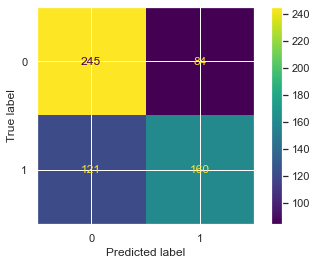

In [88]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.66      0.52      0.58       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.64       262
weighted avg       0.66      0.66      0.65       262
 



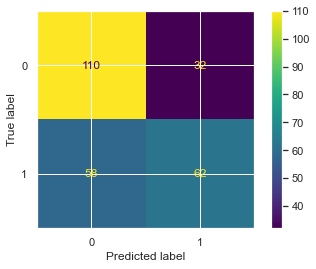

In [89]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n')

In [90]:
# Accuracy - Training Data

lr_train_acc = best_model.score(X_train, y_train)
lr_train_acc

0.6639344262295082

In [91]:
# Accuracy - Test Data

lr_test_acc = best_model.score(X_test, y_test)
lr_test_acc

0.6564885496183206

AUC: 0.733


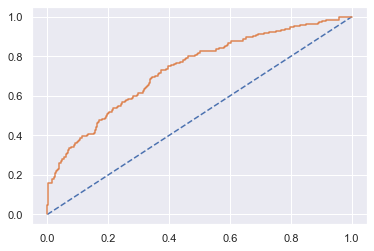

In [92]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.715


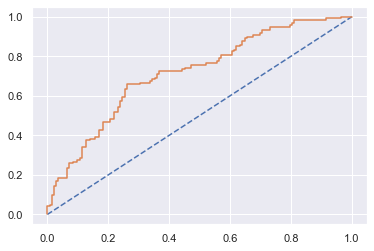

In [93]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [94]:
lr_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_train_f1=round(df.loc["1"][2],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_precision=round(df.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.66
lr_train_recall  0.57
lr_train_f1  0.61


In [95]:
lr_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_test_f1=round(df.loc["1"][2],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_precision=round(df.loc["1"][0],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.66
lr_test_recall  0.52
lr_test_f1  0.58


### LDA MODEL

In [96]:
df2.head()

HolidayPackage   Salary  Age  Educ  No_young_children  No_older_children  \
1               0  48412.0   30     8                  1                  1   
2               1  37207.0   45     8                  0                  1   
3               0  58022.0   46     9                  0                  0   
4               0  66503.0   31    11                  2                  0   
5               0  66734.0   44    12                  0                  2   

   Foreign  
1        0  
2        0  
3        0  
4        0  
5        0

In [97]:
df2.shape

(872, 7)

In [98]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HolidayPackage     872 non-null    int64  
 1   Salary             872 non-null    float64
 2   Age                872 non-null    int64  
 3   Educ               872 non-null    int64  
 4   No_young_children  872 non-null    int64  
 5   No_older_children  872 non-null    int64  
 6   Foreign            872 non-null    uint8  
dtypes: float64(1), int64(5), uint8(1)
memory usage: 88.5 KB


In [100]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df2[feature].unique()))
        print(pd.Categorical(df2[feature].unique()).codes)
        df2[feature] = pd.Categorical(df2[feature]).codes

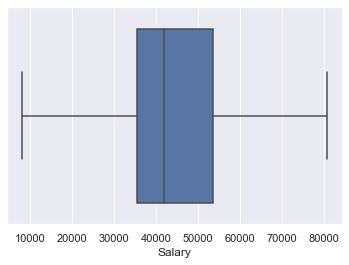

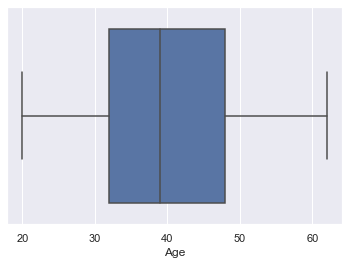

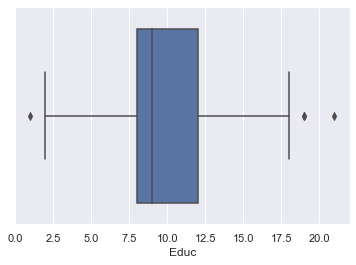

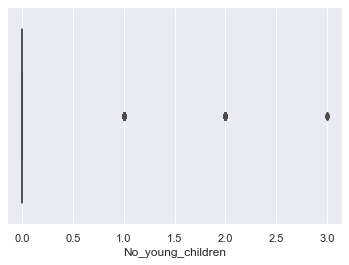

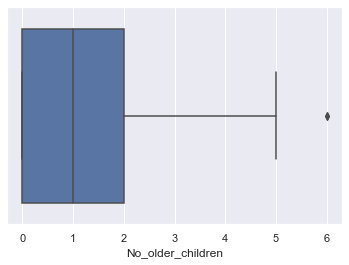

In [102]:
cols = ['Salary' ,'Age', 'Educ', 'No_young_children', 'o_older_children']

for i in cols:
    sns.boxplot(df2[i])
    plt.show()

In [103]:
df2.head()

HolidayPackage   Salary  Age  Educ  No_young_children  No_older_children  \
1               0  48412.0   30     8                  1                  1   
2               1  37207.0   45     8                  0                  1   
3               0  58022.0   46     9                  0                  0   
4               0  66503.0   31    11                  2                  0   
5               0  66734.0   44    12                  0                  2   

   Foreign  
1        0  
2        0  
3        0  
4        0  
5        0

In [104]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HolidayPackage     872 non-null    int64  
 1   Salary             872 non-null    float64
 2   Age                872 non-null    int64  
 3   Educ               872 non-null    int64  
 4   No_young_children  872 non-null    int64  
 5   No_older_children  872 non-null    int64  
 6   Foreign            872 non-null    uint8  
dtypes: float64(1), int64(5), uint8(1)
memory usage: 88.5 KB


In [106]:
X = df2.drop('HolidayPackage',axis=1)
Y = df2.pop('HolidayPackage')

In [107]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [108]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [109]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [110]:
pred_class_test

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [111]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [112]:
lda_train_acc = model.score(X_train,Y_train)
lda_train_acc

0.6622950819672131

In [113]:
print(classification_report(Y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610



In [114]:
confusion_matrix(Y_train, pred_class_train)

array([[243,  86],
       [120, 161]], dtype=int64)

In [115]:
lda_test_acc = model.score(X_test,Y_test)
lda_test_acc

0.648854961832061

In [116]:
print(classification_report(Y_test, pred_class_test))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262



In [117]:
confusion_matrix(Y_test, pred_class_test)

array([[108,  34],
       [ 58,  62]], dtype=int64)

### AUC and ROC for the training data & test data

AUC for Train dataset: 0.731
AUC for test dataset: 0.731


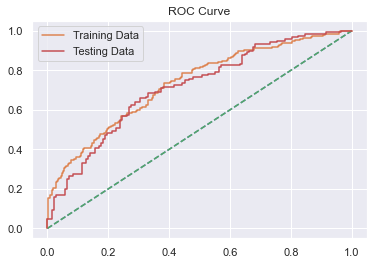

In [118]:
# predict probabilities
probs_train = model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]

# calculate AUC
auc = roc_auc_score(y_train, probs_train)
print('AUC for Train dataset: %.3f' % auc)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,label = 'Training Data')

# predict probabilities
probs_test = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]

# calculate AUC
test_auc = roc_auc_score(y_test, probs_test,)
print('AUC for test dataset: %.3f' % auc)

# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,label = 'Testing Data')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Confusion Matrix for the training data and testing data

In [119]:
confusion_matrix(y_train, ytrain_predict)

array([[245,  84],
       [121, 160]], dtype=int64)

[Text(0.5, 12.5, 'Predicted Label'),
 Text(587.5454545454544, 0.5, 'Actual Label')]

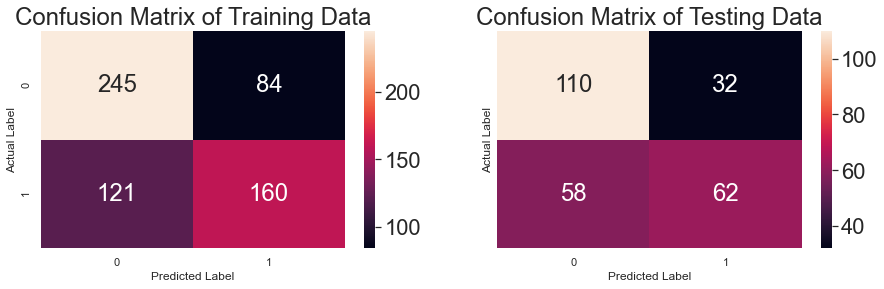

In [120]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label")

### Training Data and Test Data Classification Report Comparison

In [122]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.66      0.52      0.58       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.64       262
weighted avg       0.66      0.66      0.65       262
 



### Model Evaluation

In [123]:
# Accuracy - Training Data
print ('Model score for training dataset', best_model.score(X_train, y_train))
print ('Model score for training dataset',best_model.score(X_test, y_test))

Model score for training dataset 0.6639344262295082
Model score for training dataset 0.6564885496183206


### AUC and ROC for the training data & test data

AUC for Train dataset: 0.733
AUC for test dataset: 0.733


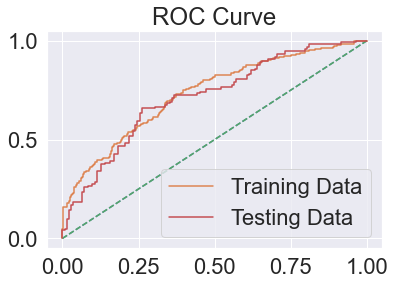

In [124]:
# predict probabilities
probs_train = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs_train,)
print('AUC for Train dataset: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,label = 'Training Data')

# predict probabilities
probs_test = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs_test,)
print('AUC for test dataset: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,label = 'Testing Data')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Confusion Matrix for the training data and testing data

[Text(0.5, 2.5, 'Predicted Label'),
 Text(587.5454545454544, 0.5, 'Actual Label')]

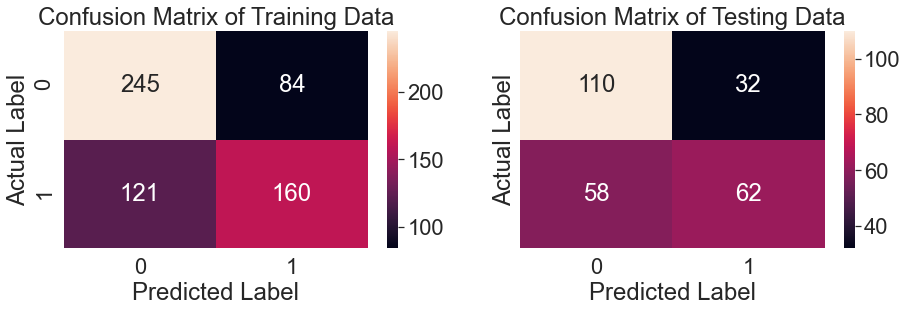

In [125]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label")

### Training Data and Test Data Classification Report Comparison

In [126]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.66      0.52      0.58       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.64       262
weighted avg       0.66      0.66      0.65       262
 



### Logistics Regression Conclusion

Train Data:
    
    AUC: 73%
    Accuracy: 66%
    Precision: 66%
    f1-Score: 61%
    Recall: 57%
        
Test Data:
    
    AUC: 73%
    Accuracy: 66%
    Precision: 68%
    f1-Score: 58%
    Recall: 52%
        
    Train and Test dataset have similar statistics, hence model is giving similar result for test and train data set..

With accuracy of 66% and recall rate of 52%, model is only able to predict 52% of total tours which were actually claimed as claimed.

Precision is 68% of test data which means, out of total employees predicted by model as opt for tour, 68% employees actually opted for the tour

F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

Since we are building a model to predict if whether employee will opt for tour or not, for practical purposes, we will be more interested in correctly classifying 1 (employees opting for tour) than 0(employees not opting for tour).

If a employee not opting for tour is incorrectly predicted to be "opted for tour" by the model, then the impact on cost for the travel company would be bare minimum. But if am employee opted for tour is incorrectly predicted to be not opted by the model, then the cost impact would be very high for the tour and travel company. Its a loss of potential lead for the company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

As Recall rate of test dataset is very poor around 52% thus this doesnt looks good enough for classification
Logistic regression equation is as shown below :-
Log (odd) = (2.81) + (-0.0) * Salary + (-0.05) * Age + (-1.3) * No_young_children + (1.21) * Foreign

We can see that salary coefficient is very small , this it can be removed. So our equation would become :-

Log (odd) = (2.81) + (-0.05) * Age + (-1.3) * No_young_children + (1.21) * Foreign

Most important attribute here is No of young children followed by Foreign and age

### LDA Model

In [131]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [132]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

### Prediction

In [133]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

### Training Data and Test Data Confusion Matrix Comparison

[Text(0.5, 11.5, 'Predicted Label'), Text(101.5, 0.5, 'Actual Label')]

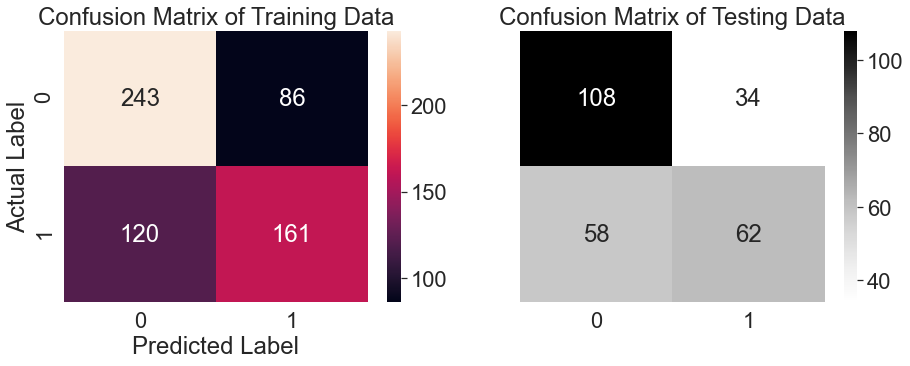

In [134]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,5))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")

### Training Data and Test Data Classification Report Comparison

In [135]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



### Probability prediction for the training and test data

In [136]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [137]:
#pred_prob_train[:,1]

AUC for the Training Data: 0.731
AUC for the Test Data: 0.714


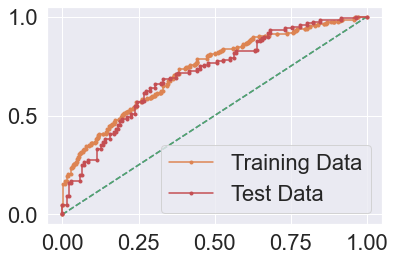

In [138]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### LDA Conclusion

Train Data:

    AUC: 73%
    Accuracy: 66%
    Precision: 65%
    f1-Score: 61%
    Recall: 57%
Test Data:

    AUC: 71%
    Accuracy: 65%
    Precision: 65%
    f1-Score: 57%
    Recall: 52%
        
Train and Test dataset have similar statistics, hence model is giving similar result for test and train data set..

With accuracy of 65% and recall rate of 52%, model is only able to predict 52% of total tours which were actually claimed as claimed.

Precision is 65% of test data which means, out of total employees predicted by model as opt for tour, 65% employees actually opted for the tour

F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

Since we are building a model to predict if whether employee will opt for tour or not, for practical purposes, we will be more interested in correctly classifying 1 (employees opting for tour) than 0(employees not opting for tour).

If a employee not opting for tour is incorrectly predicted to be "opted for tour" by the model, then the impact on cost for the travel company would be bare minimum. But if am employee opted for tour is incorrectly predicted to be not opted by the model, then the cost impact would be very high for the tour and travel company. Its a loss of potential lead for the company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

As Recall rate of test dataset is very poor around 52% thus this doesnt looks good enough for classification

### Inference :

On comparing all the models, it looks like that no model is over-fitting/under fitting.

All models test and train score are comparable and within 5-6% range.



#### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

0.1 

Accuracy Score 0.4738
F1 Score 0.6356 

Confusion Matrix


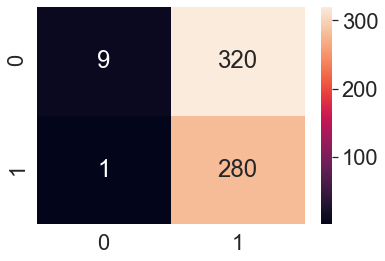

0.2 

Accuracy Score 0.523
F1 Score 0.6498 

Confusion Matrix


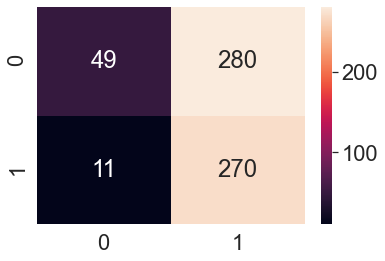

0.3 

Accuracy Score 0.6066
F1 Score 0.6774 

Confusion Matrix


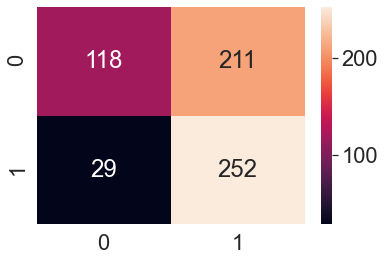

0.4 

Accuracy Score 0.6623
F1 Score 0.6677 

Confusion Matrix


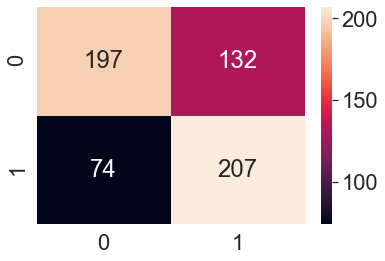

0.5 

Accuracy Score 0.6623
F1 Score 0.6098 

Confusion Matrix


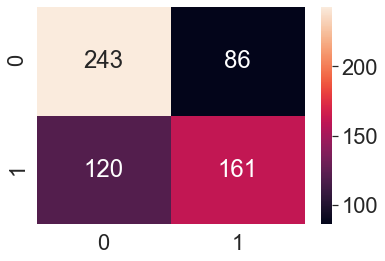

0.6 

Accuracy Score 0.6508
F1 Score 0.5192 

Confusion Matrix


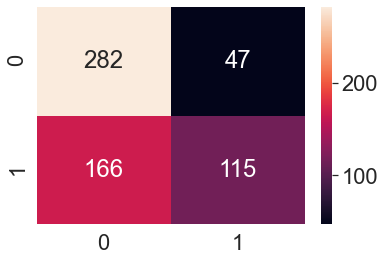

0.7 

Accuracy Score 0.6426
F1 Score 0.4263 

Confusion Matrix


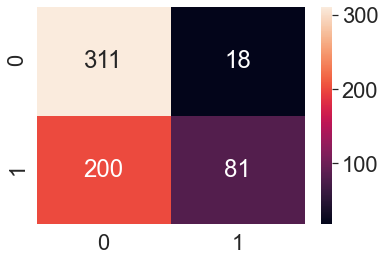

0.8 

Accuracy Score 0.5902
F1 Score 0.2038 

Confusion Matrix


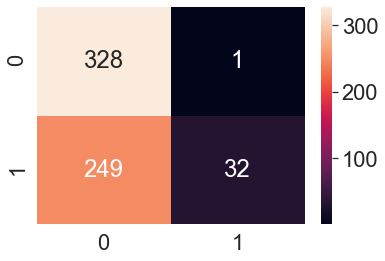

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


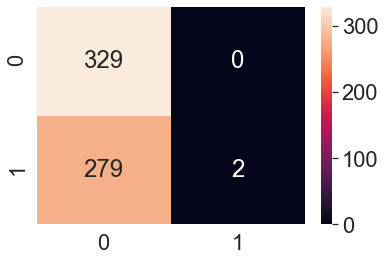

In [141]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    
    for i in range(0,len(Y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
            
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
        
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,custom_cutoff_data),4),'\n')
    
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show()

AUC for the Training Data: 0.731
AUC for the Test Data: 0.714


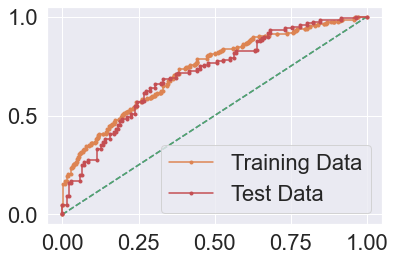

In [144]:
# AUC and ROC for the training data

# calculate AUC
lda_train_auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [145]:
lda_metrics=classification_report(Y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lr_train_f1)

lda_train_precision  0.65
lda_train_recall  0.57
lda_train_f1  0.61


In [146]:
lda_metrics=classification_report(Y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.65
lda_test_recall  0.52
lda_test_f1  0.57


In [147]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],},index=index)
round(data,2)

LR Train  LR Test  LDA Train  LDA Test
Accuracy       0.66     0.66       0.66      0.65
AUC            0.73     0.72       0.73      0.71
Recall         0.57     0.52       0.57      0.52
Precision      0.66     0.66       0.65      0.65
F1 Score       0.61     0.58       0.61      0.57

#### 2.4 Inference: Basis on these predictions, what are the insights and recommendations. Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.


If employee is foreigner and employee not having young children, chances of opting for Holiday Package is good. Special offer can be designed to domestic employees to opt for Holiday Package.

Many high salary employees are not opting for Holiday Package, company can focus on high salary employees to sell Holiday Package. Employees having older children are not opting for Holiday Package. Age of the employee is not a material in opting for holiday package.

It can be observed from coefficient arrived from both models that opting for Holiday package has strong negative relation with number of young children. Holiday packages can be modified to make infant and young children friendly to attract more employees having young children.